### 株価データ取得と移動平均

In [1]:
#!pip install pandas_datareader
#!pip install matplotlib
#https://jp.investing.com/
#!pip install ta-lib
#import talib
import talib
!python --version

Python 3.9.12


In [2]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#日経平均株価
start='2019-06-01'
end='2020-06-01'

df=data.DataReader('^N225','yahoo',start,end)

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400000,20410.880859
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200000,20408.539062
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300000,20776.099609
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600000,20774.039062
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700000,20884.710938


In [5]:
df.index

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14',
               ...
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01'],
              dtype='datetime64[ns]', name='Date', length=242, freq=None)

In [6]:
data=df.index
price=df['Adj Close']

In [7]:
span01=5
span02=25
span03=50

df['sma01']=price.rolling(window=span01).mean()
df['sma02']=price.rolling(window=span02).mean()
df['sma03']=price.rolling(window=span03).mean()


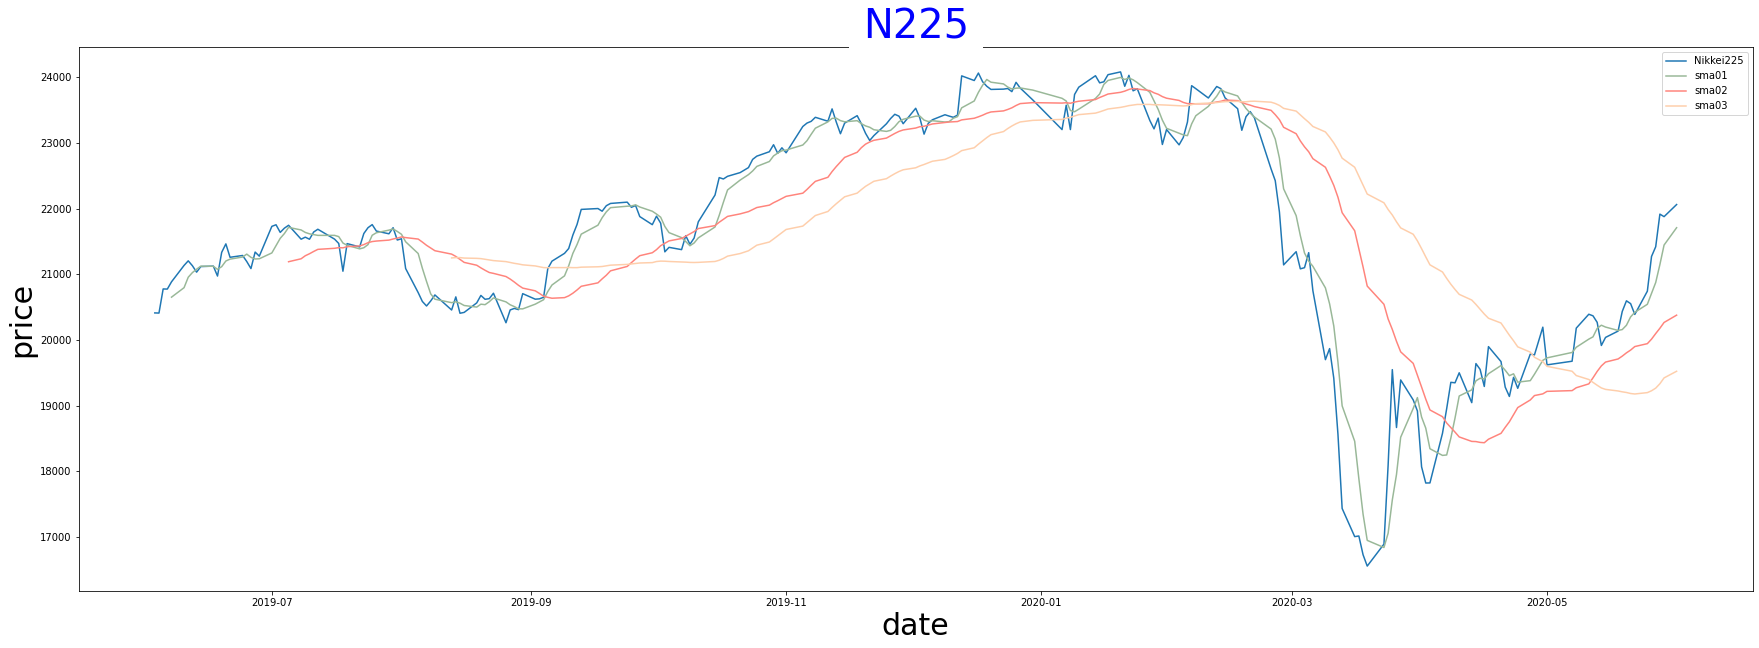

In [8]:
plt.figure(figsize=(30,10))
plt.plot(data,price,label='Nikkei225')
plt.plot(data,df['sma01'],label='sma01',color='#99b898')
plt.plot(data,df['sma02'],label='sma02',color='#ff847c')
plt.plot(data,df['sma03'],label='sma03',color='#feceab')

plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.xlabel('date',color='black',size=30)
plt.ylabel('price',color='black',size=30)
plt.legend()

In [9]:
pd.set_option('display.max_rows',None)
df.head()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03
Date,,,,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400000,20410.880859,NaN,NaN,NaN
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200000,20408.539062,NaN,NaN,NaN
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300000,20776.099609,NaN,NaN,NaN
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600000,20774.039062,NaN,NaN,NaN
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700000,20884.710938,20650.853906,NaN,NaN


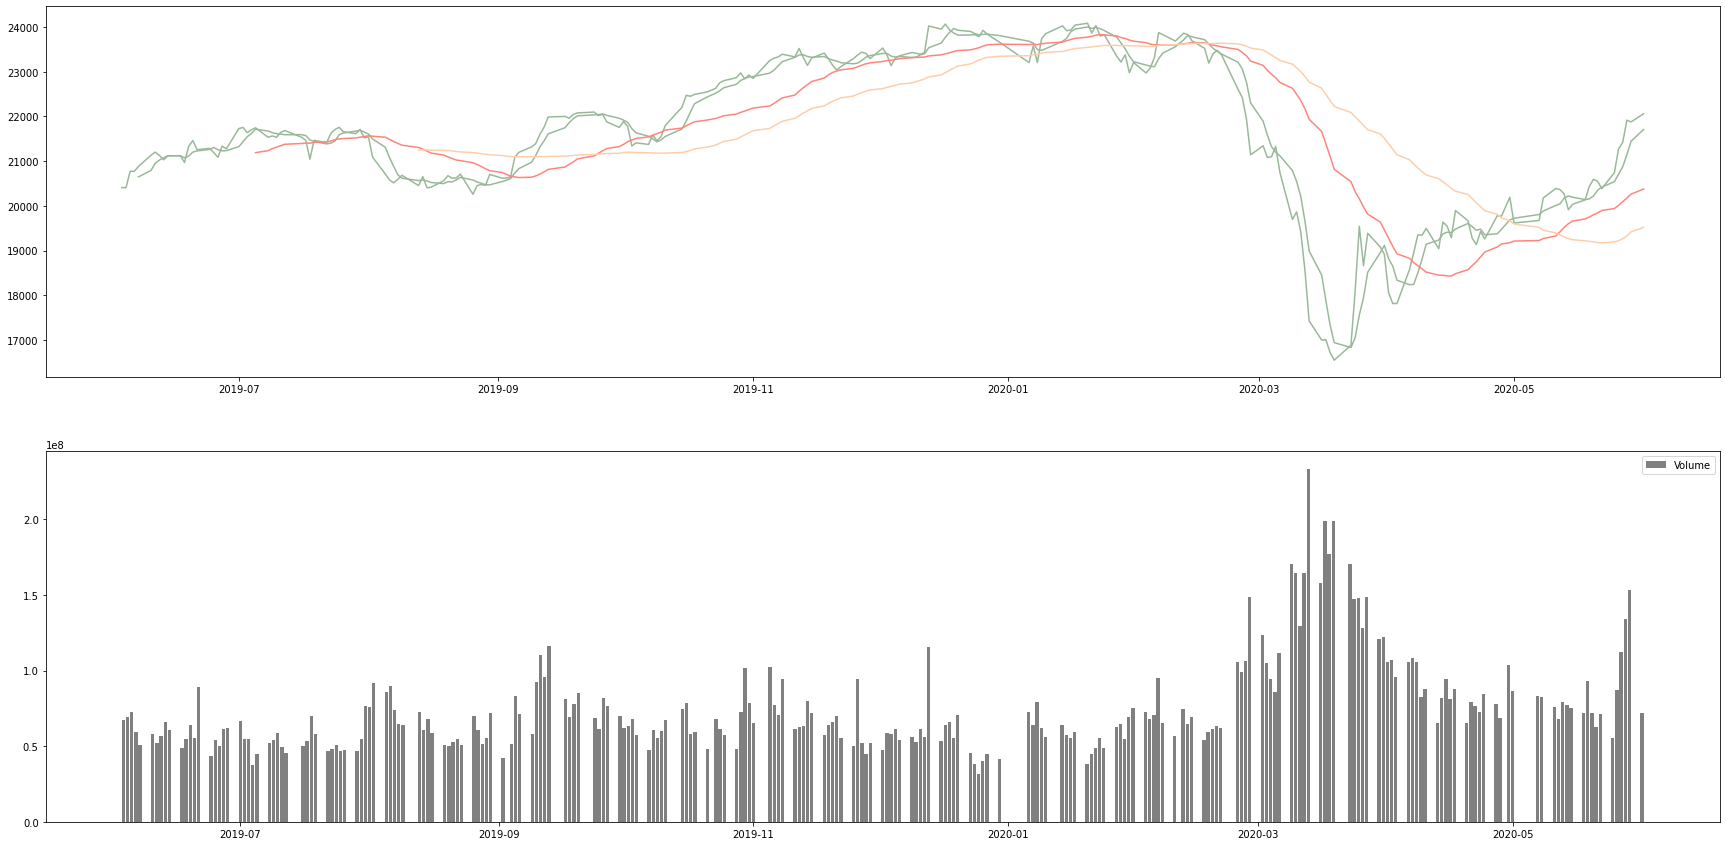

In [10]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(data,price,label='Close',color='#99b898')
plt.plot(data,df['sma01'],label='sma01',color='#99b898')
plt.plot(data,df['sma02'],label='sma02',color='#ff847c')
plt.plot(data,df['sma03'],label='sma03',color='#feceab')

plt.subplot(2,1,2)
plt.bar(data,df['Volume'],label='Volume',color='grey')

plt.legend()

## テクニカル指標

### MACD,RSI,ボリンジャーバンド

In [11]:
#import os
#os.getcwd()

In [12]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [13]:
start = '2021-09-01'
end = '2022-09-01'

df=data.DataReader('^N225','yahoo',start,end)

In [14]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-01,28457.669922,28179.039062,28179.039062,28451.019531,64800000,28451.019531
2021-09-02,28626.199219,28412.910156,28522.460938,28543.509766,60100000,28543.509766
2021-09-03,29149.650391,28607.869141,28626.480469,29128.109375,74900000,29128.109375
2021-09-06,29705.039062,29469.349609,29501.220703,29659.890625,68300000,29659.890625
2021-09-07,30048.230469,29838.429688,29883.919922,29916.140625,75200000,29916.140625


In [15]:
date=df.index
close=df['Adj Close']

In [16]:
span01=5
span02=25
span03=50

df['sma01']=close.rolling(window=span01).mean()
df['sma02']=close.rolling(window=span02).mean()
df['sma03']=close.rolling(window=span03).mean()


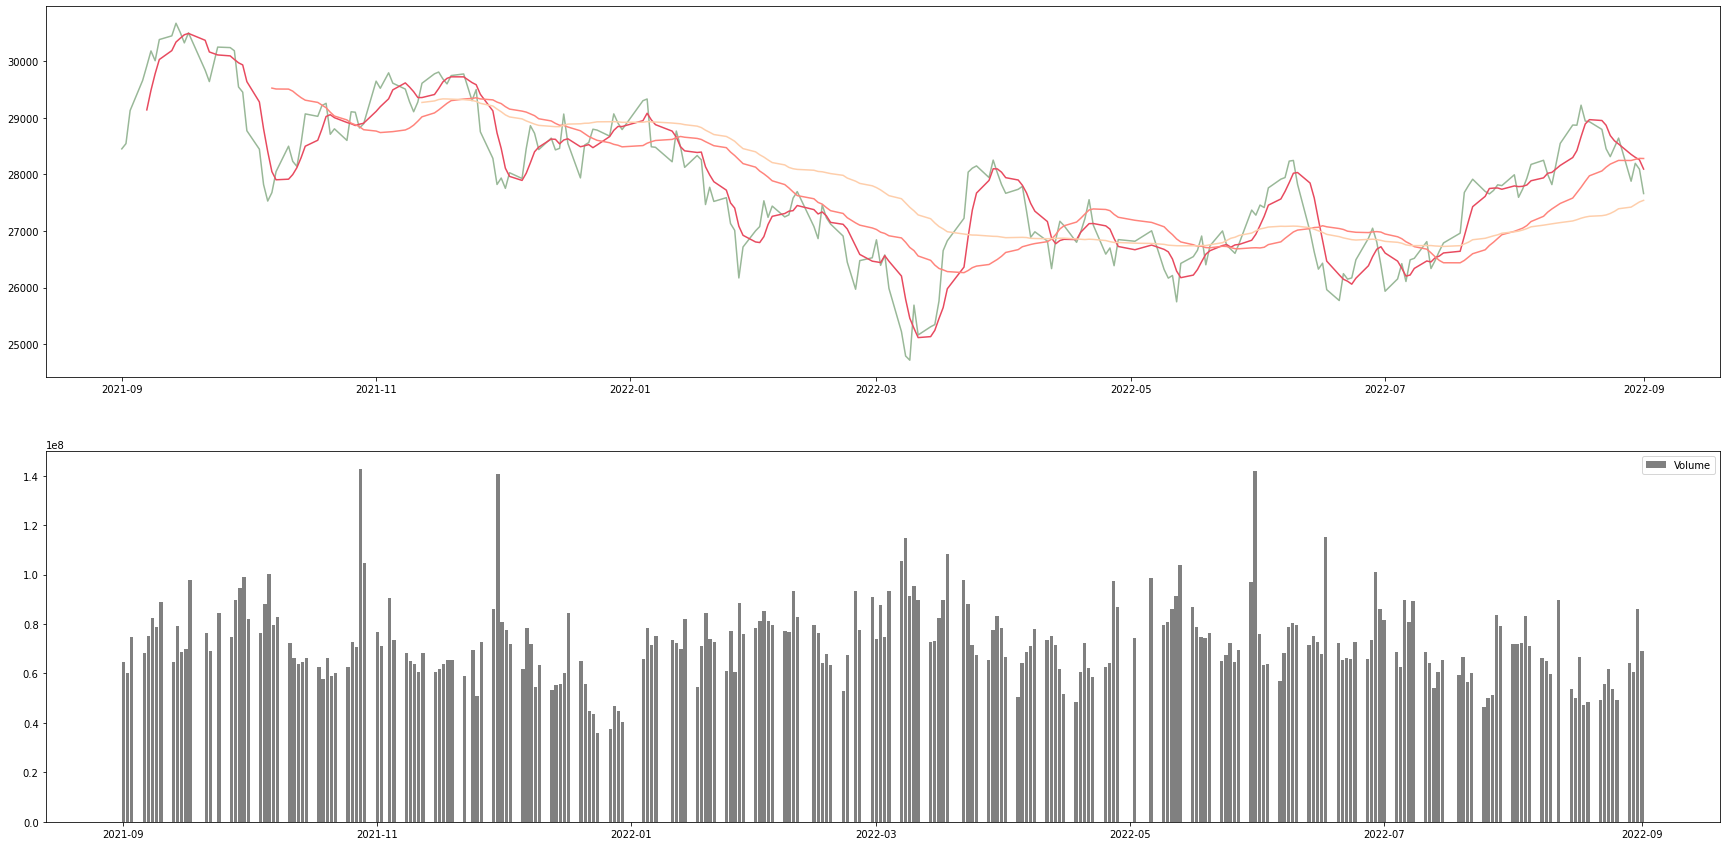

In [17]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label=('Close'),color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

In [18]:
df['macd'],df['macfsignal'],df['macdhist'] =ta.MACD(close,fastperiod=12,slowperiod=26,signalperiod=9)

In [19]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macfsignal,macdhist
Date,,,,,,,,,,,,
2022-08-26,28792.929688,28608.699219,28639.470703,28641.380859,49100000,28641.380859,28536.222266,28246.903750,27392.965508,335.474424,391.953704,-56.479280
2022-08-29,28179.089844,27788.119141,28161.060547,27878.960938,64100000,27878.960938,28353.114453,28245.475781,27421.920742,258.883097,365.339583,-106.456485
2022-08-30,28233.800781,27944.250000,28086.720703,28195.580078,60700000,28195.580078,28301.680469,28265.328984,27466.572344,221.182780,336.508222,-115.325442
2022-08-31,28104.800781,27906.169922,27928.089844,28091.529297,86200000,28091.529297,28257.292187,28282.781719,27512.978516,180.824546,305.371487,-124.546941
2022-09-01,27832.779297,27589.699219,27797.000000,27661.470703,68900000,27661.470703,28093.784375,28280.610547,27541.281719,112.837500,266.864690,-154.027190


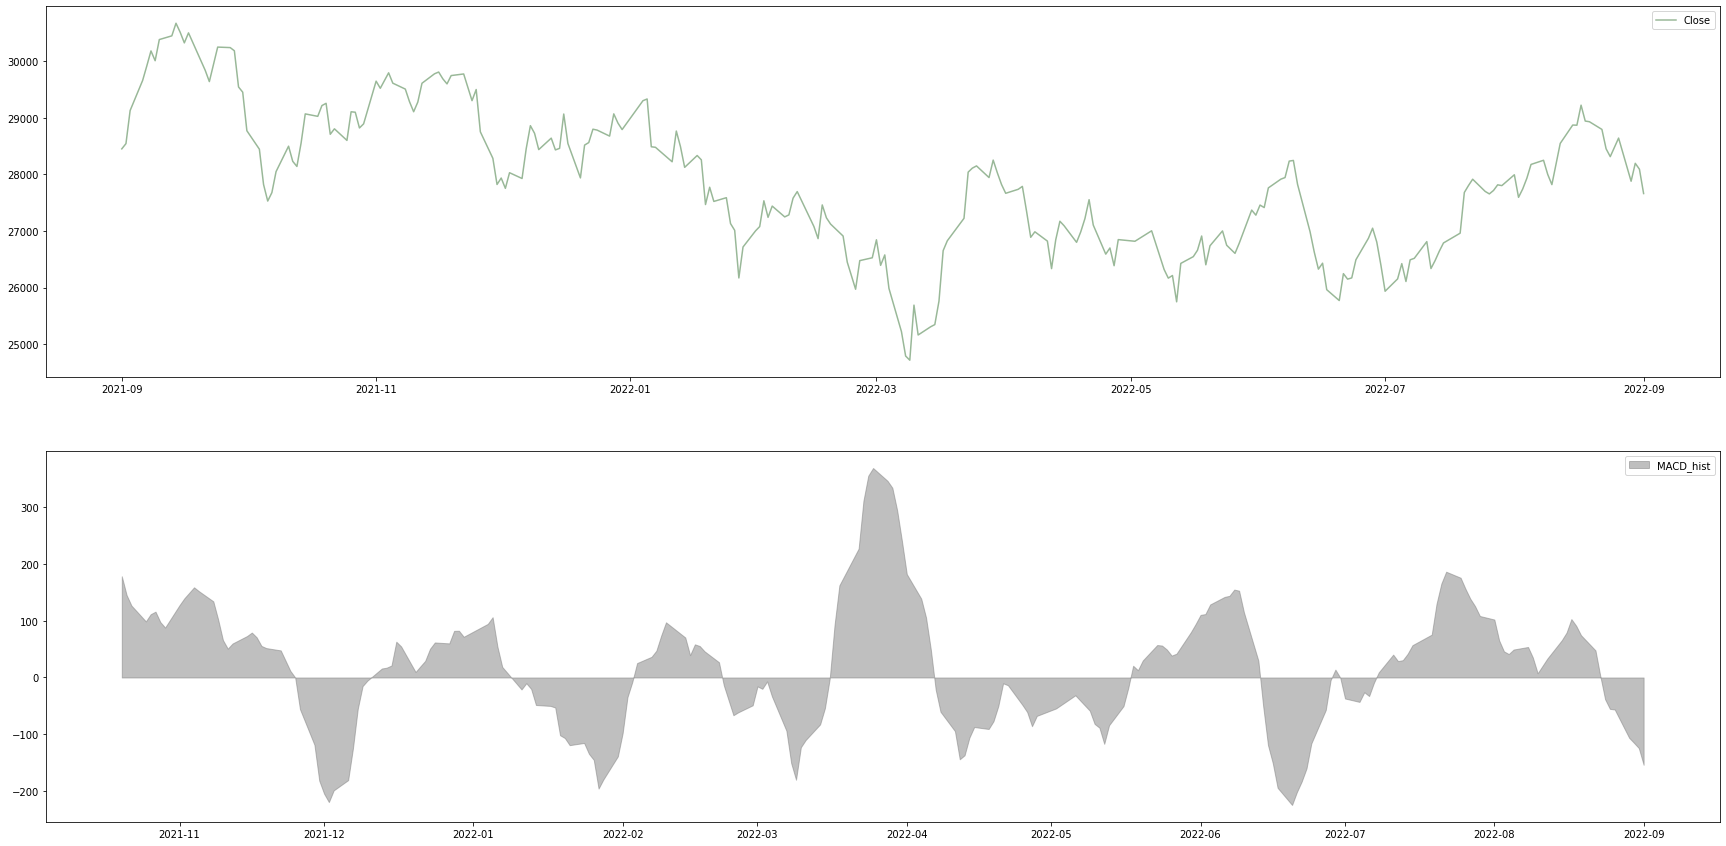

In [20]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.legend()


plt.subplot(2,1,2)
plt.fill_between(date,df['macdhist'],alpha=0.5,label='MACD_hist',color='grey')
#plt.hlines(0,start,end,color='grey',linestyles='dashed')
plt.legend()


# RSI  
25日のRSIを作る

In [21]:
df['RSI']=ta.RSI(close,timeperiod=span02)
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macfsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2022-08-26,28792.929688,28608.699219,28639.470703,28641.380859,49100000,28641.380859,28536.222266,28246.903750,27392.965508,335.474424,391.953704,-56.479280,57.738094
2022-08-29,28179.089844,27788.119141,28161.060547,27878.960938,64100000,27878.960938,28353.114453,28245.475781,27421.920742,258.883097,365.339583,-106.456485,50.698685
2022-08-30,28233.800781,27944.250000,28086.720703,28195.580078,60700000,28195.580078,28301.680469,28265.328984,27466.572344,221.182780,336.508222,-115.325442,53.168603
2022-08-31,28104.800781,27906.169922,27928.089844,28091.529297,86200000,28091.529297,28257.292187,28282.781719,27512.978516,180.824546,305.371487,-124.546941,52.272142
2022-09-01,27832.779297,27589.699219,27797.000000,27661.470703,68900000,27661.470703,28093.784375,28280.610547,27541.281719,112.837500,266.864690,-154.027190,48.734426


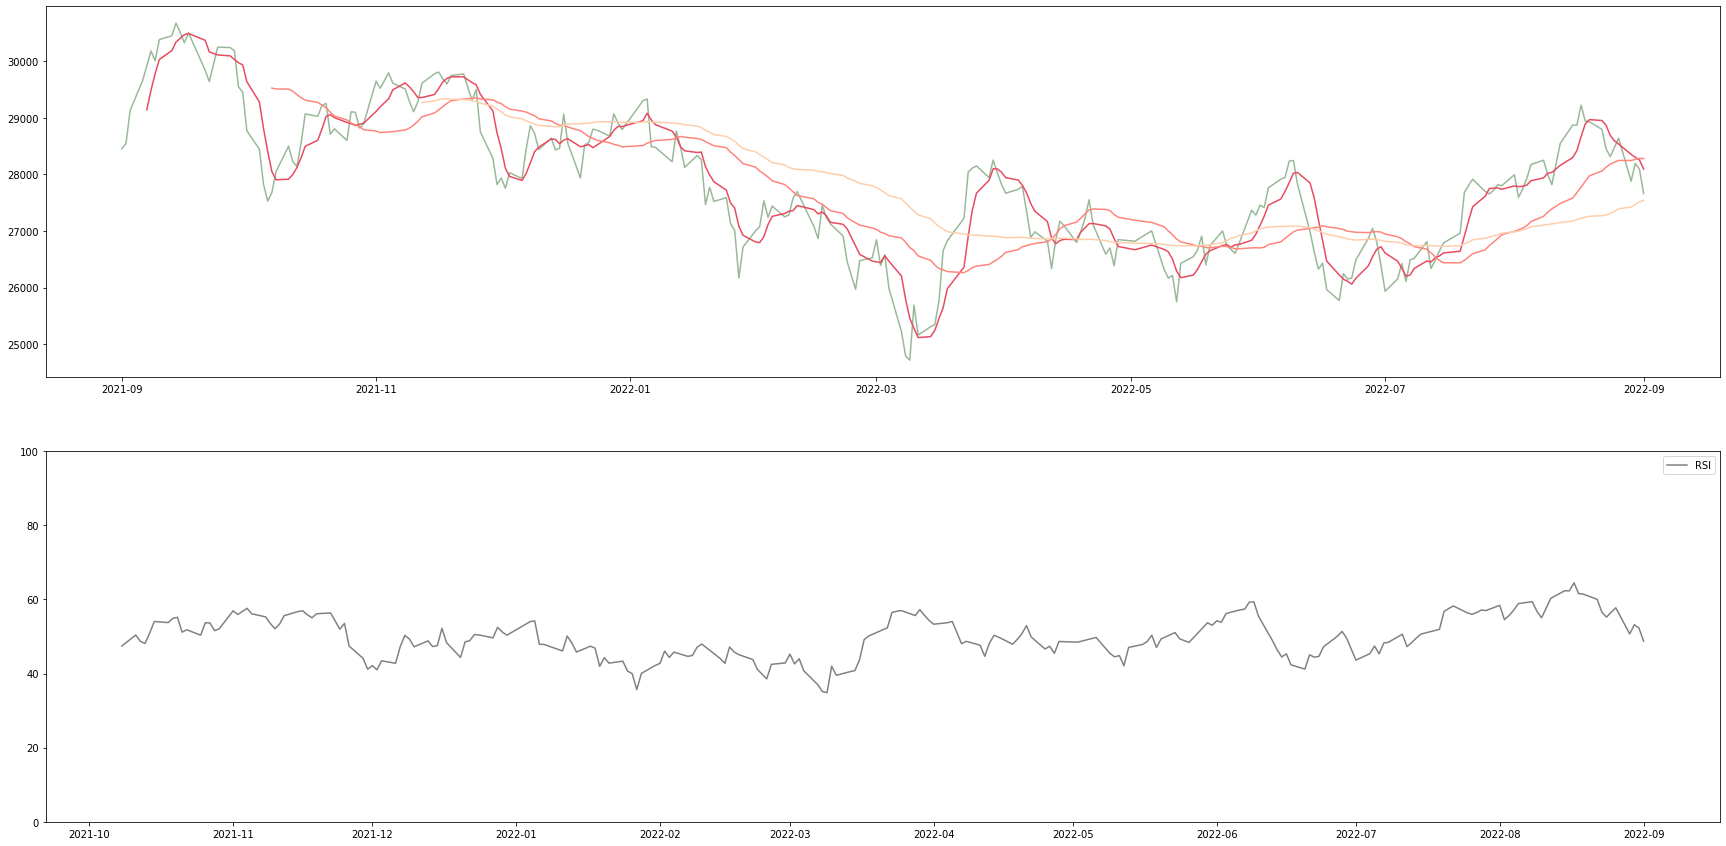

In [22]:
#RSIのグラフ化

plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label=('Close'),color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')

plt.subplot(2,1,2)
plt.plot(date,df['RSI'],label='RSI',color='grey')
plt.ylim(0,100)
#plt.hlines([30,50,70],start,end,color='grey',linestyles='dashed')
plt.legend()

savename='RSI.png'
plt.savefig(savename,dpi=300)

# ボリンジャーバンド  

In [23]:
df['upper'],df['middle'],df['lower']=ta.BBANDS(close,timeperiod=span02,nbdevup=2,nbdevdn=2,matype=0)

In [24]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macfsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,,
2022-08-26,28792.929688,28608.699219,28639.470703,28641.380859,49100000,28641.380859,28536.222266,28246.903750,27392.965508,335.474424,391.953704,-56.479280,57.738094,29214.023767,28246.903750,27279.783733
2022-08-29,28179.089844,27788.119141,28161.060547,27878.960938,64100000,27878.960938,28353.114453,28245.475781,27421.920742,258.883097,365.339583,-106.456485,50.698685,29214.657058,28245.475781,27276.294504
2022-08-30,28233.800781,27944.250000,28086.720703,28195.580078,60700000,28195.580078,28301.680469,28265.328984,27466.572344,221.182780,336.508222,-115.325442,53.168603,29208.936988,28265.328984,27321.720980
2022-08-31,28104.800781,27906.169922,27928.089844,28091.529297,86200000,28091.529297,28257.292187,28282.781719,27512.978516,180.824546,305.371487,-124.546941,52.272142,29196.264965,28282.781719,27369.298472
2022-09-01,27832.779297,27589.699219,27797.000000,27661.470703,68900000,27661.470703,28093.784375,28280.610547,27541.281719,112.837500,266.864690,-154.027190,48.734426,29199.715095,28280.610547,27361.505998


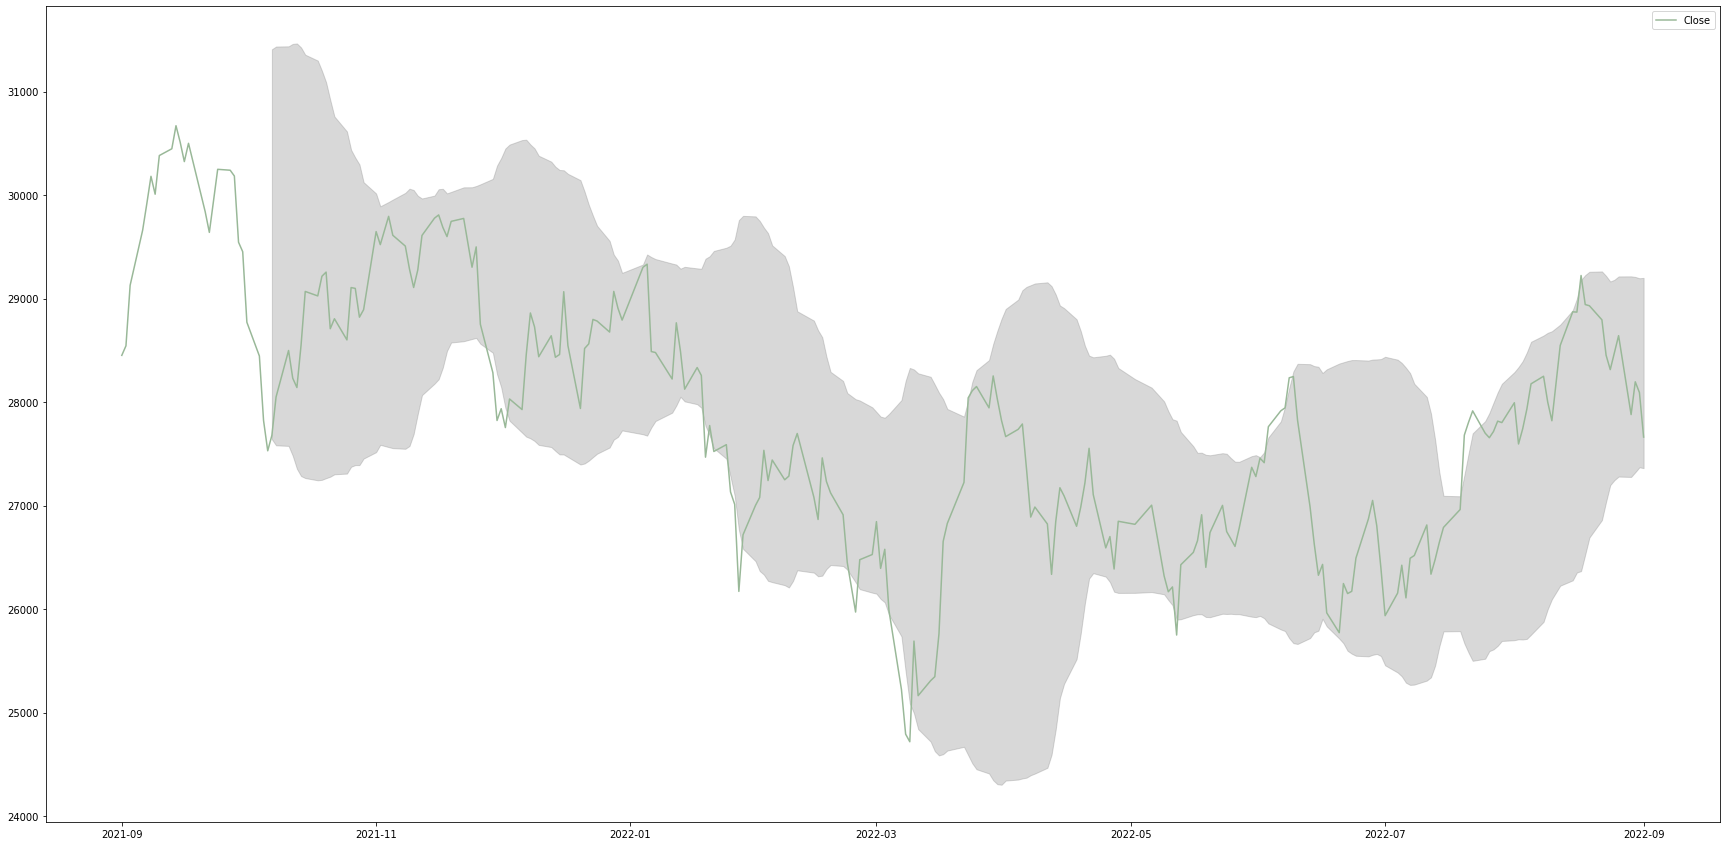

In [25]:
plt.figure(figsize=(30,15))

plt.plot(date,close,label='Close',color='#99b898')
plt.fill_between(date,df['upper'],df['lower'],color='grey',alpha=0.3)
plt.legend()

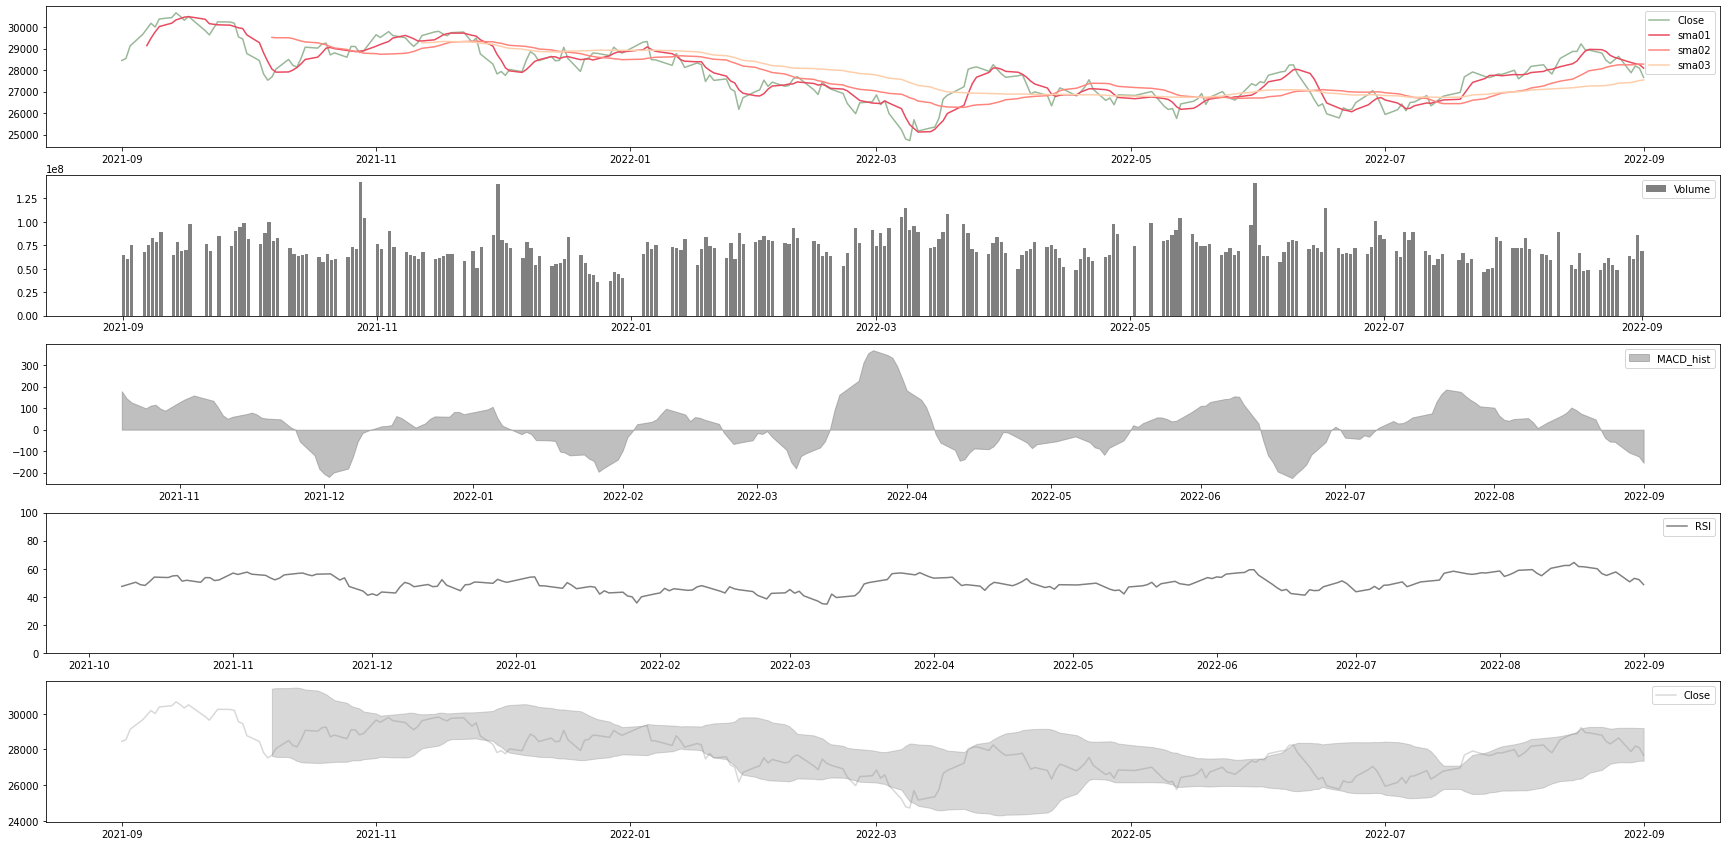

In [26]:
plt.figure(figsize=(30,15))
plt.subplot(5,1,1)

plt.plot(date,close,label=('Close'),color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(5,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

plt.subplot(5,1,3)
plt.fill_between(date,df['macdhist'],color='grey',alpha=0.5,label='MACD_hist')
plt.legend()

plt.subplot(5,1,4)
plt.plot(date,df['RSI'],label='RSI',color='grey')
plt.ylim(0,100)
plt.legend()

plt.subplot(5,1,5)
plt.plot(date,close,label='Close',color='grey',alpha=0.3)
plt.fill_between(date,df['upper'],df['lower'],color='grey',alpha=0.3)
plt.legend()

## Bitcoin(日本円とビットコイン)の可視化

In [27]:
start ='2017-07-01'
end ='2020-07-01'

df=data.DataReader('BTC-JPY','yahoo',start,end)

In [28]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-30,287531.75000,278451.59375,284369.50000,278722.3750,96651674246,278722.3750
2017-07-01,282590.59375,271800.50000,280043.62500,273521.6875,87623336102,273521.6875
2017-07-02,282328.50000,269060.28125,273729.53125,281301.1250,90204526708,281301.1250
2017-07-03,293702.09375,279127.28125,280413.40625,290687.5000,109301377440,290687.5000
2017-07-04,297343.37500,290076.75000,290340.56250,293881.2500,111323890975,293881.2500


In [29]:
date=df.index
close=df['Adj Close']

span01=5
span02=25
span03=50

df['sma01']=close.rolling(window=span01).mean()
df['sma02']=close.rolling(window=span02).mean()
df['sma03']=close.rolling(window=span03).mean()
df['macd'],df['macfsignal'],df['macdhist'] =ta.MACD(close,fastperiod=12,slowperiod=26,signalperiod=9)
df['RSI']=ta.RSI(close,timeperiod=span02)
df['upper'],df['middle'],df['lower']=ta.BBANDS(close,timeperiod=span02,nbdevup=2,nbdevdn=2,matype=0)

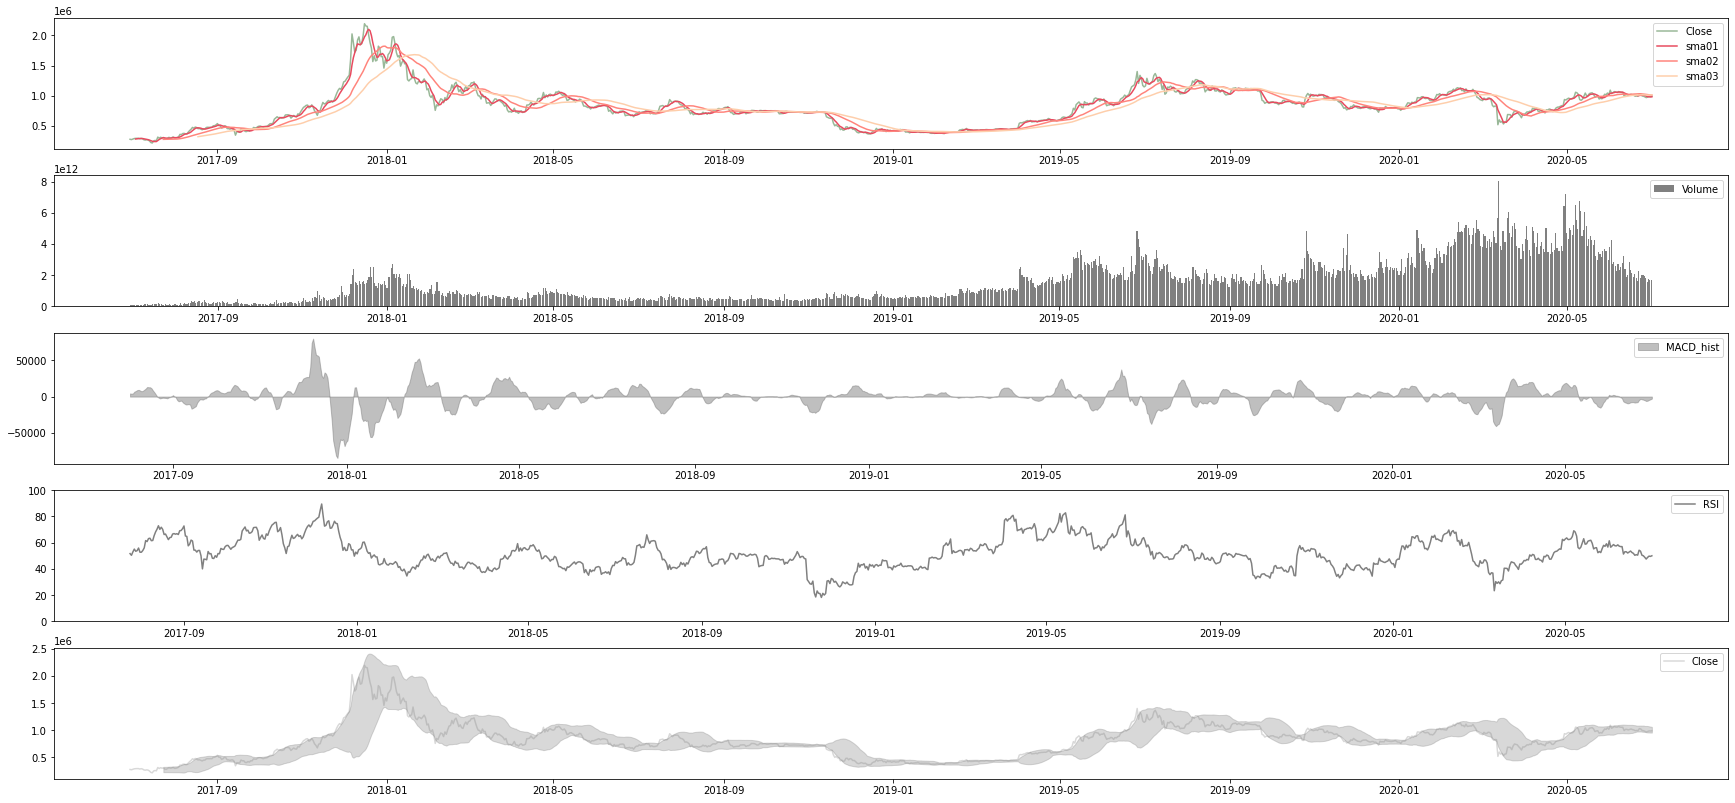

In [30]:
plt.figure(figsize=(30,14))
plt.subplot(5,1,1)

plt.plot(date,close,label=('Close'),color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(5,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

plt.subplot(5,1,3)
plt.fill_between(date,df['macdhist'],color='grey',alpha=0.5,label='MACD_hist')
plt.legend()

plt.subplot(5,1,4)
plt.plot(date,df['RSI'],label='RSI',color='grey')
plt.ylim(0,100)
plt.legend()

plt.subplot(5,1,5)
plt.plot(date,close,label='Close',color='grey',alpha=0.3)
plt.fill_between(date,df['upper'],df['lower'],color='grey',alpha=0.3)
plt.legend()

# 為替(日本円とUSドル)

In [31]:
start='2020-01-01'
end='2020-07-01'

df=data.DataReader('DEXJPUS','fred',start,end)
df.head()

,DEXJPUS
DATE,
2020-01-01,NaN
2020-01-02,108.43
2020-01-03,107.94
2020-01-06,108.36
2020-01-07,108.53


In [32]:
df=df.rename(columns={'DEXJPUS':'Adj Close'})
df.head()

,Adj Close
DATE,
2020-01-01,NaN
2020-01-02,108.43
2020-01-03,107.94
2020-01-06,108.36
2020-01-07,108.53


In [33]:
df=df.dropna()
df.head()

,Adj Close
DATE,
2020-01-02,108.43
2020-01-03,107.94
2020-01-06,108.36
2020-01-07,108.53
2020-01-08,109.03


In [34]:
date=df.index
close=df['Adj Close']

span01=5
span02=25
span03=50

df['sma01']=close.rolling(window=span01).mean()
df['sma02']=close.rolling(window=span02).mean()
df['sma03']=close.rolling(window=span03).mean()
df['macd'],df['macfsignal'],df['macdhist'] =ta.MACD(close,fastperiod=12,slowperiod=26,signalperiod=9)
df['RSI']=ta.RSI(close,timeperiod=span02)
df['upper'],df['middle'],df['lower']=ta.BBANDS(close,timeperiod=span02,nbdevup=2,nbdevdn=2,matype=0)

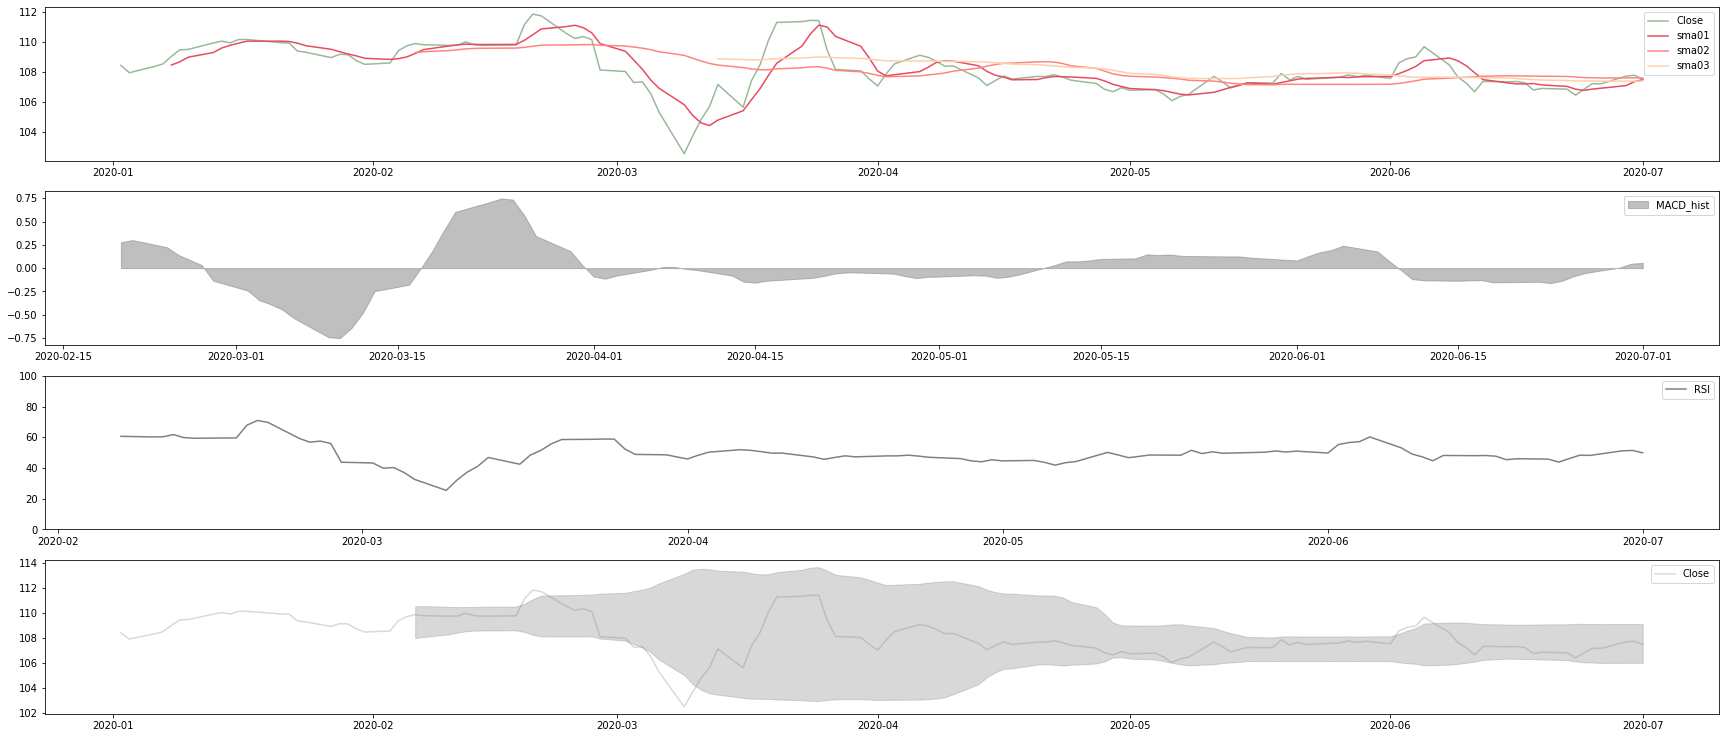

In [35]:
plt.figure(figsize=(30,13))
plt.subplot(4,1,1)

plt.plot(date,close,label=('Close'),color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(4,1,2)
plt.fill_between(date,df['macdhist'],color='grey',alpha=0.5,label='MACD_hist')
plt.legend()

plt.subplot(4,1,3)
plt.plot(date,df['RSI'],label='RSI',color='grey')
plt.ylim(0,100)
plt.legend()

plt.subplot(4,1,4)
plt.plot(date,close,label='Close',color='grey',alpha=0.3)
plt.fill_between(date,df['upper'],df['lower'],color='grey',alpha=0.3)
plt.legend()

# ローソク足

In [36]:
#!pip3 install mplfinance

In [37]:
import mplfinance as mpf

In [38]:
start='2019-07-01'
end='2020-07-01'

df=data.DataReader('^N225','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000,21729.970703
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000,21754.269531
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000,21638.160156
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000,21702.449219
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000,21746.380859


In [39]:
date=df.index
close=df['Adj Close']

In [40]:
span01=5
span02=25
span03=50

df['upper'],df['middle'],df['lower']=ta.BBANDS(close,timeperiod=span02,nbdevup=2,nbdevdn=2,matype=0)



In [41]:
df_candle=df[['High','Low','Open','Close','Volume']]
df_candle.head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000


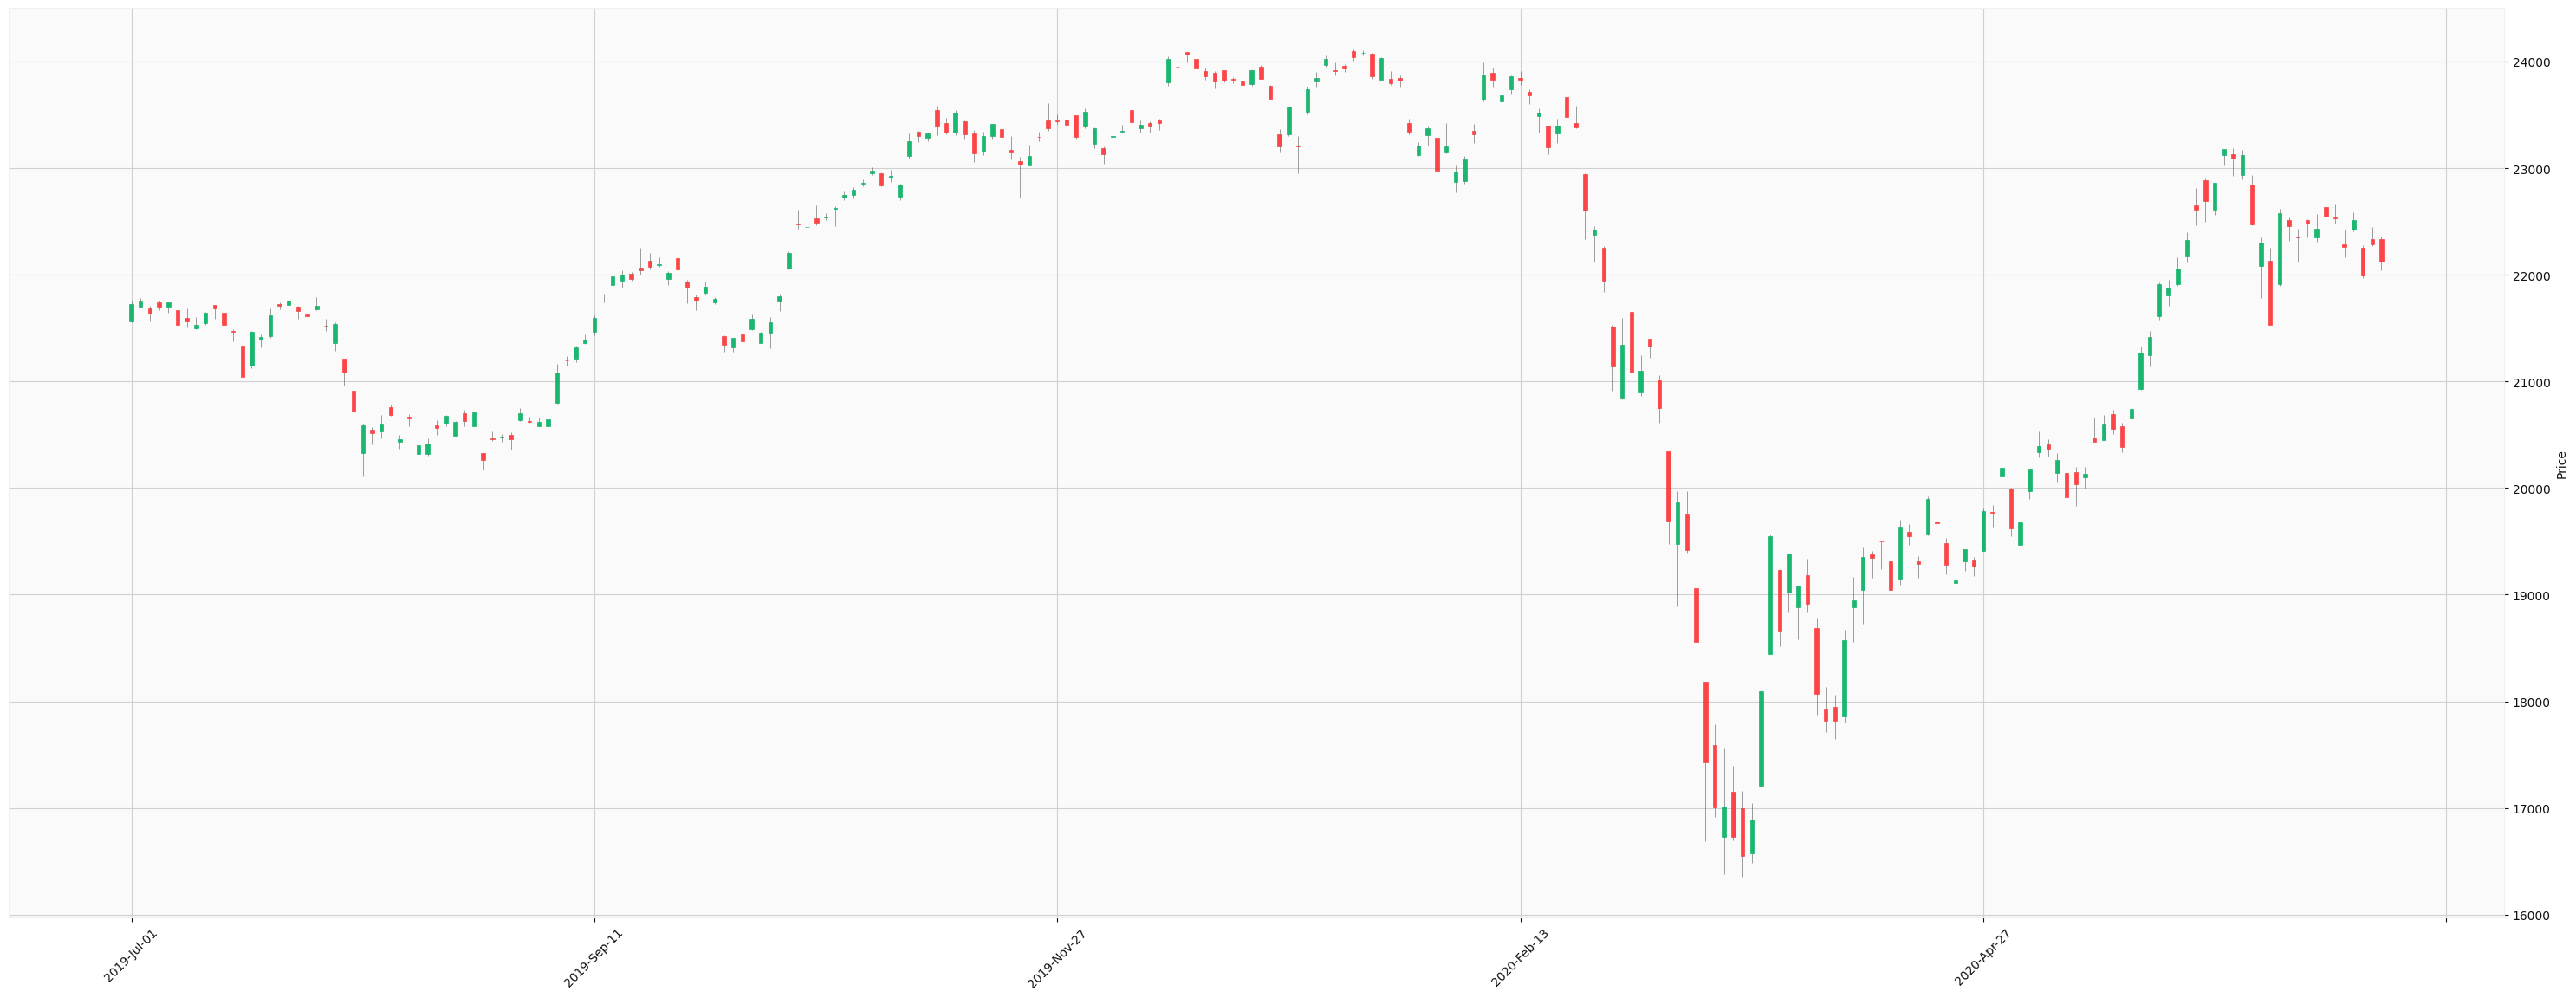

In [42]:
mpf.plot(df_candle,type='candle',style='yahoo',figsize=(40,15))

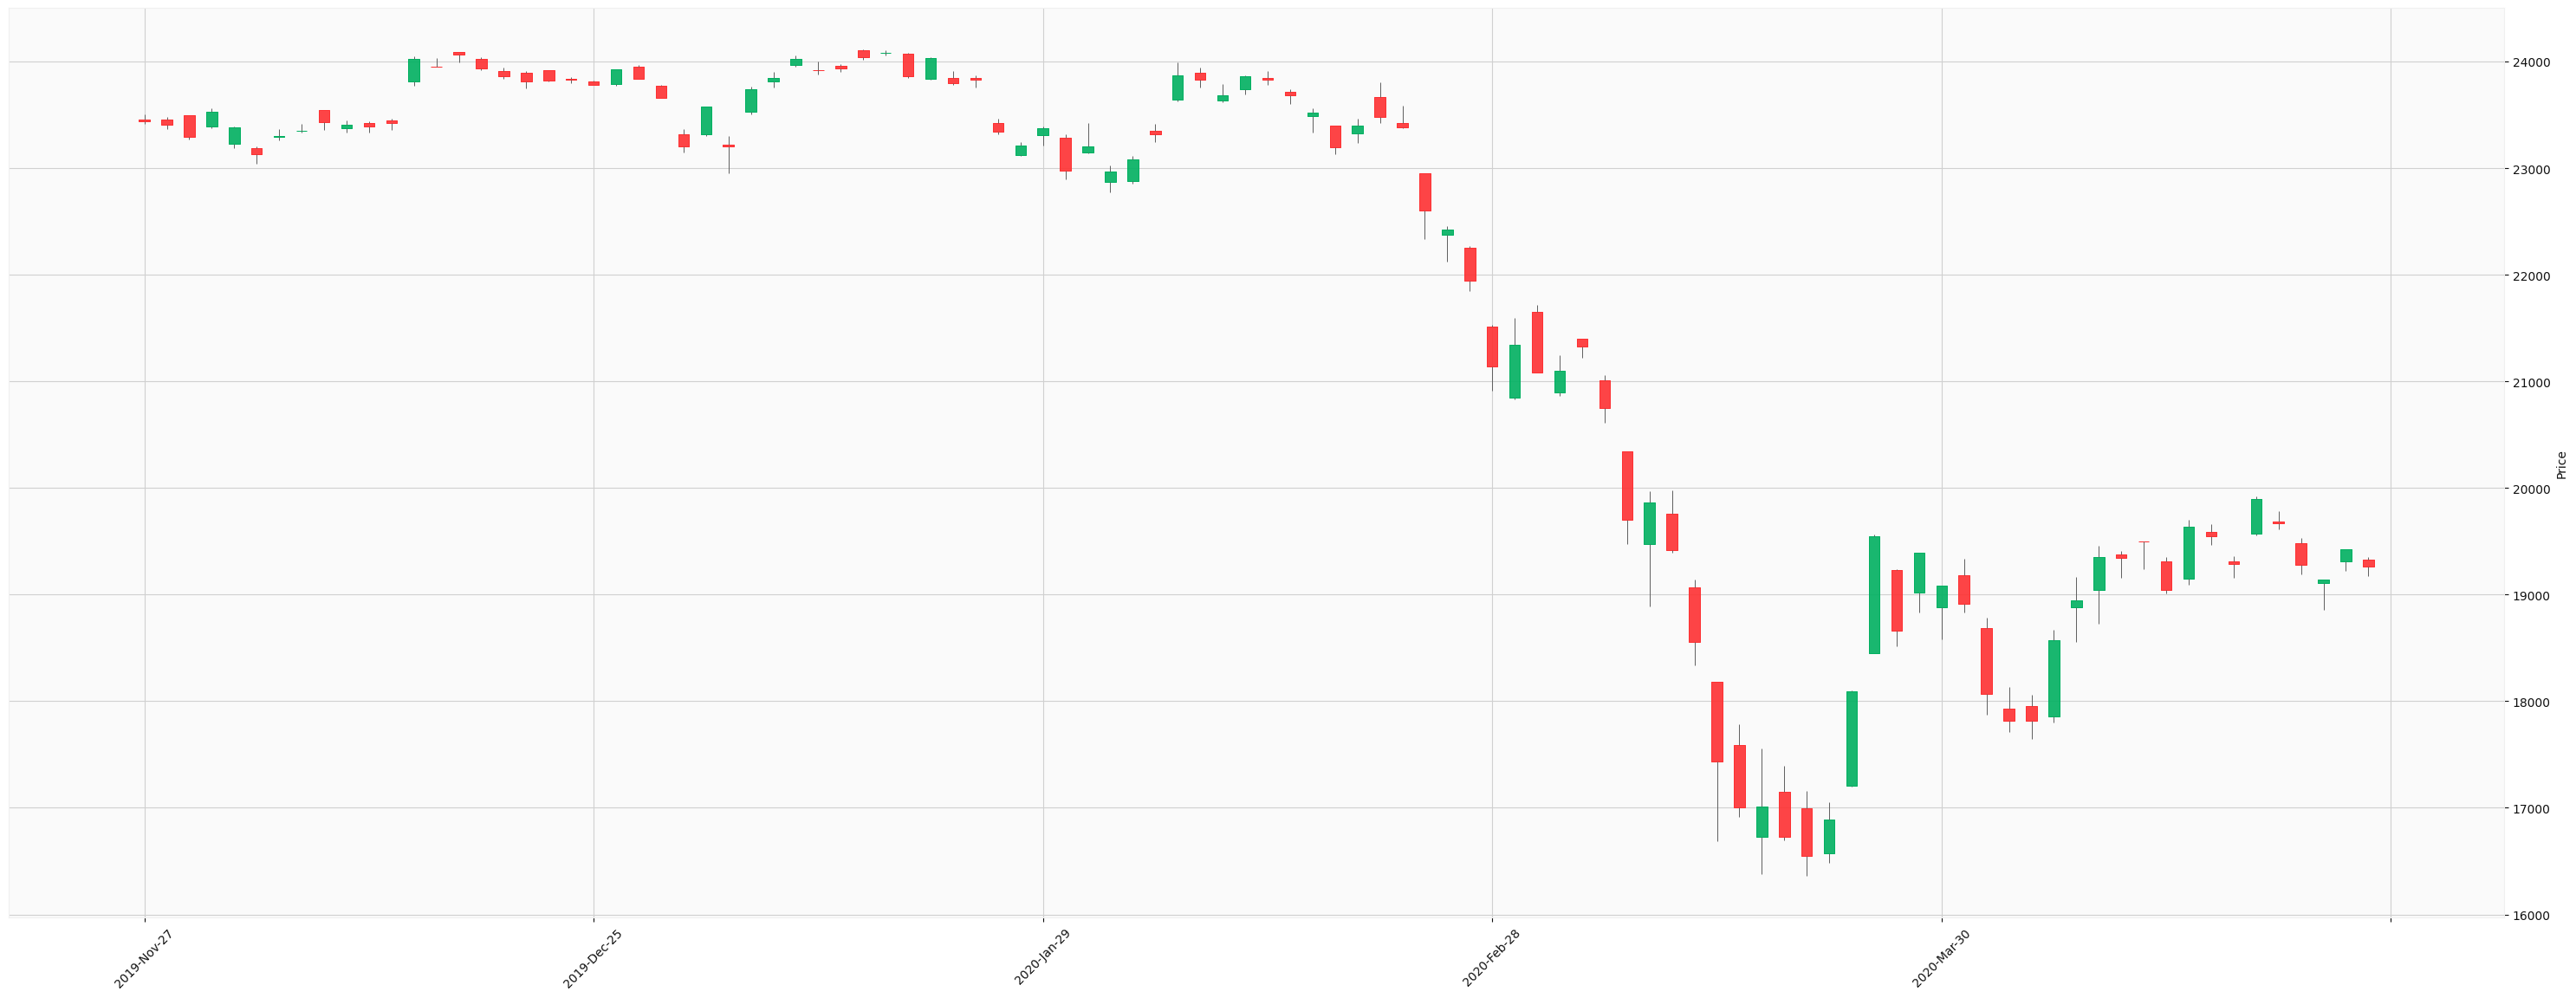

In [43]:
mpf.plot(df_candle[100:200],type='candle',style='yahoo',figsize=(40,15))

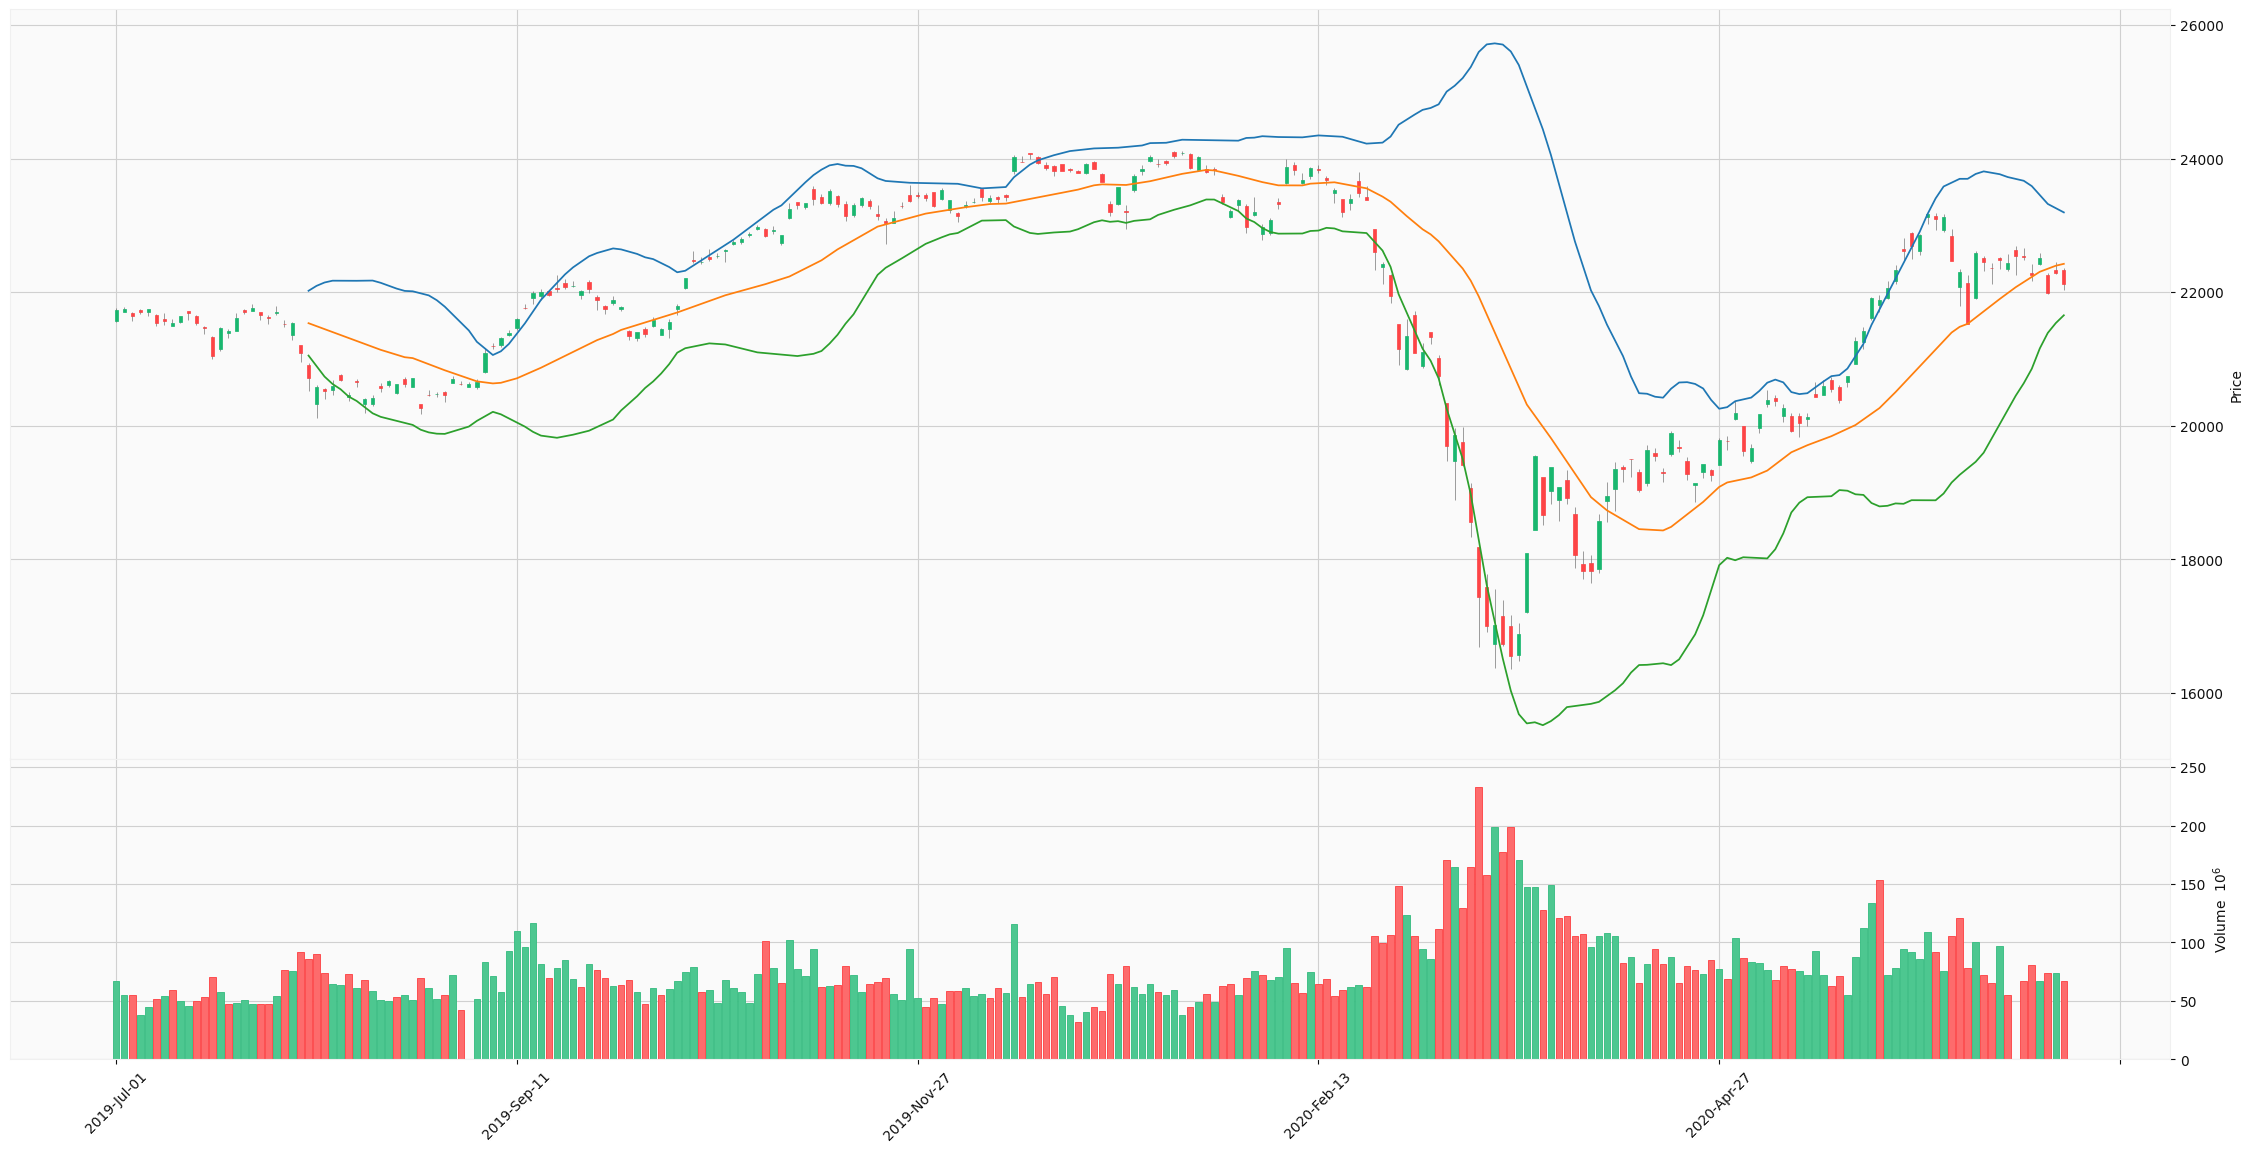

In [44]:
tcdf=df[['upper','middle','lower']]
apd=mpf.make_addplot(tcdf)

mpf.plot(df_candle,addplot=apd,type='candle',volume=True,style='yahoo',figsize=(30,15))

## ロウソク足と他のグラフ追加

In [45]:
import mplfinance as mpf
from pandas_datareader import data
import warnings
warnings.simplefilter('ignore')

In [46]:
start ='2020-01-01'
end ='2020-06-30'

df=data.DataReader('^N225','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,23365.359375,23148.529297,23319.759766,23204.859375,72800000,23204.859375
2020-01-07,23577.439453,23299.919922,23320.119141,23575.720703,64300000,23575.720703
2020-01-08,23303.210938,22951.179688,23217.490234,23204.759766,79400000,23204.759766
2020-01-09,23767.089844,23506.150391,23530.289062,23739.869141,62200000,23739.869141
2020-01-10,23903.289062,23761.080078,23813.279297,23850.570312,55900000,23850.570312


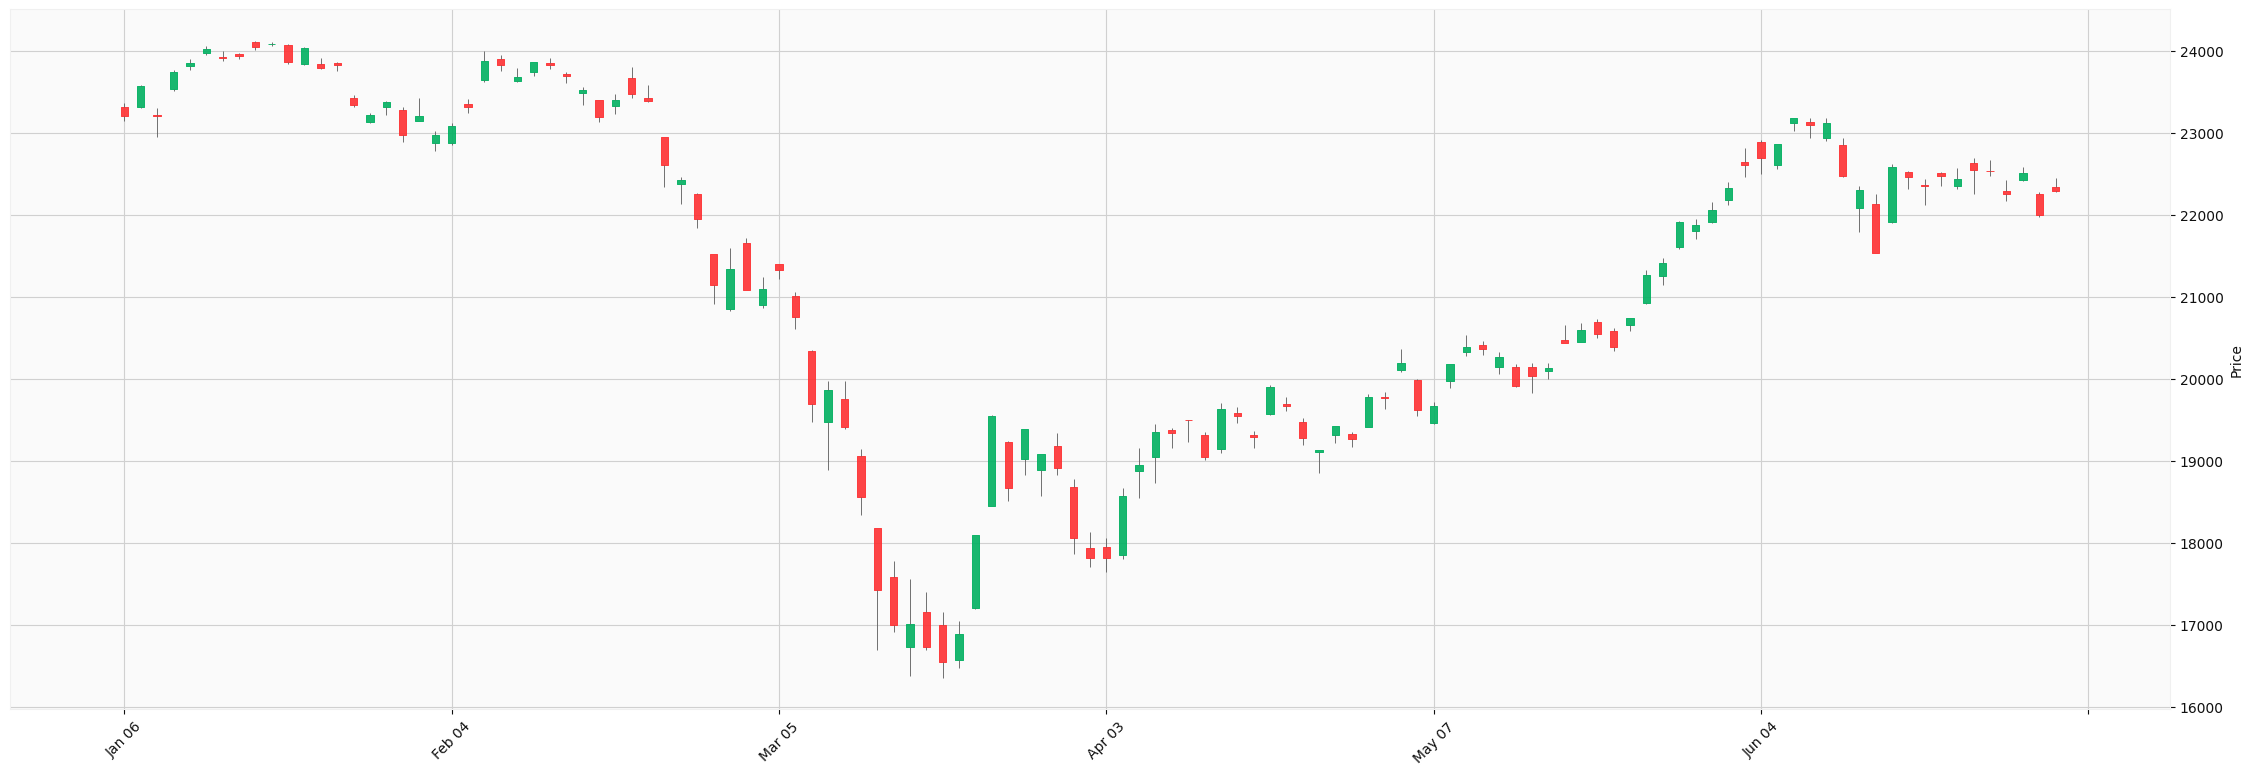

In [47]:
mpf.plot(df,type='candle',figsize=(30,10),style='yahoo')

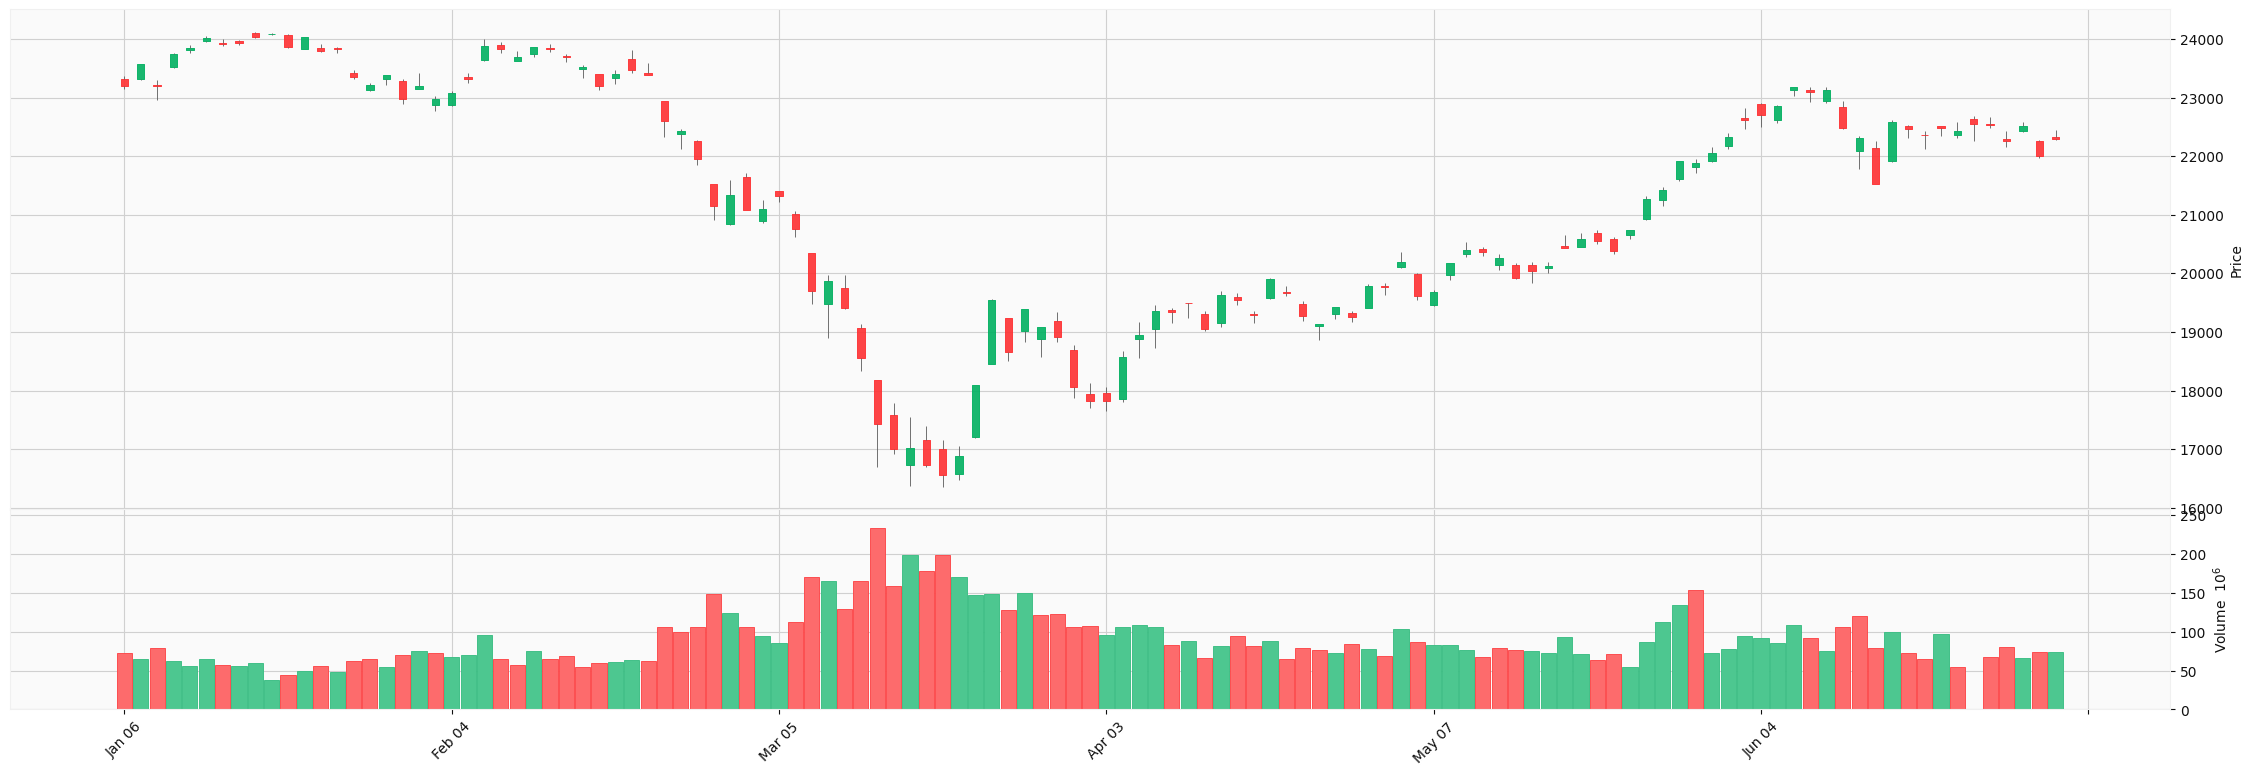

In [48]:
#グラフに出来高を追加

mpf.plot(df,type='candle',figsize=(30,10),style='yahoo',volume=True)


In [49]:
#ボリンジャーバンドの追加
import talib as ta

span01=5
span02=25
span03=50

df['upper'],df['middle'],df['lower']=ta.BBANDS(close,timeperiod=span02,nbdevup=2,nbdevdn=2,matype=0)
df.tail()


,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower
Date,,,,,,,,,
2020-06-24,22663.289062,22479.859375,22541.009766,22534.320312,67000000,22534.320312,23668.783006,22152.969297,20637.155588
2020-06-25,22423.410156,22165.140625,22287.869141,22259.789062,80800000,22259.789062,23589.084373,22221.268437,20853.452502
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,23454.238943,22306.225234,21158.211526
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,23321.613062,22356.360781,21391.108501
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,23255.768474,22397.039609,21538.310745


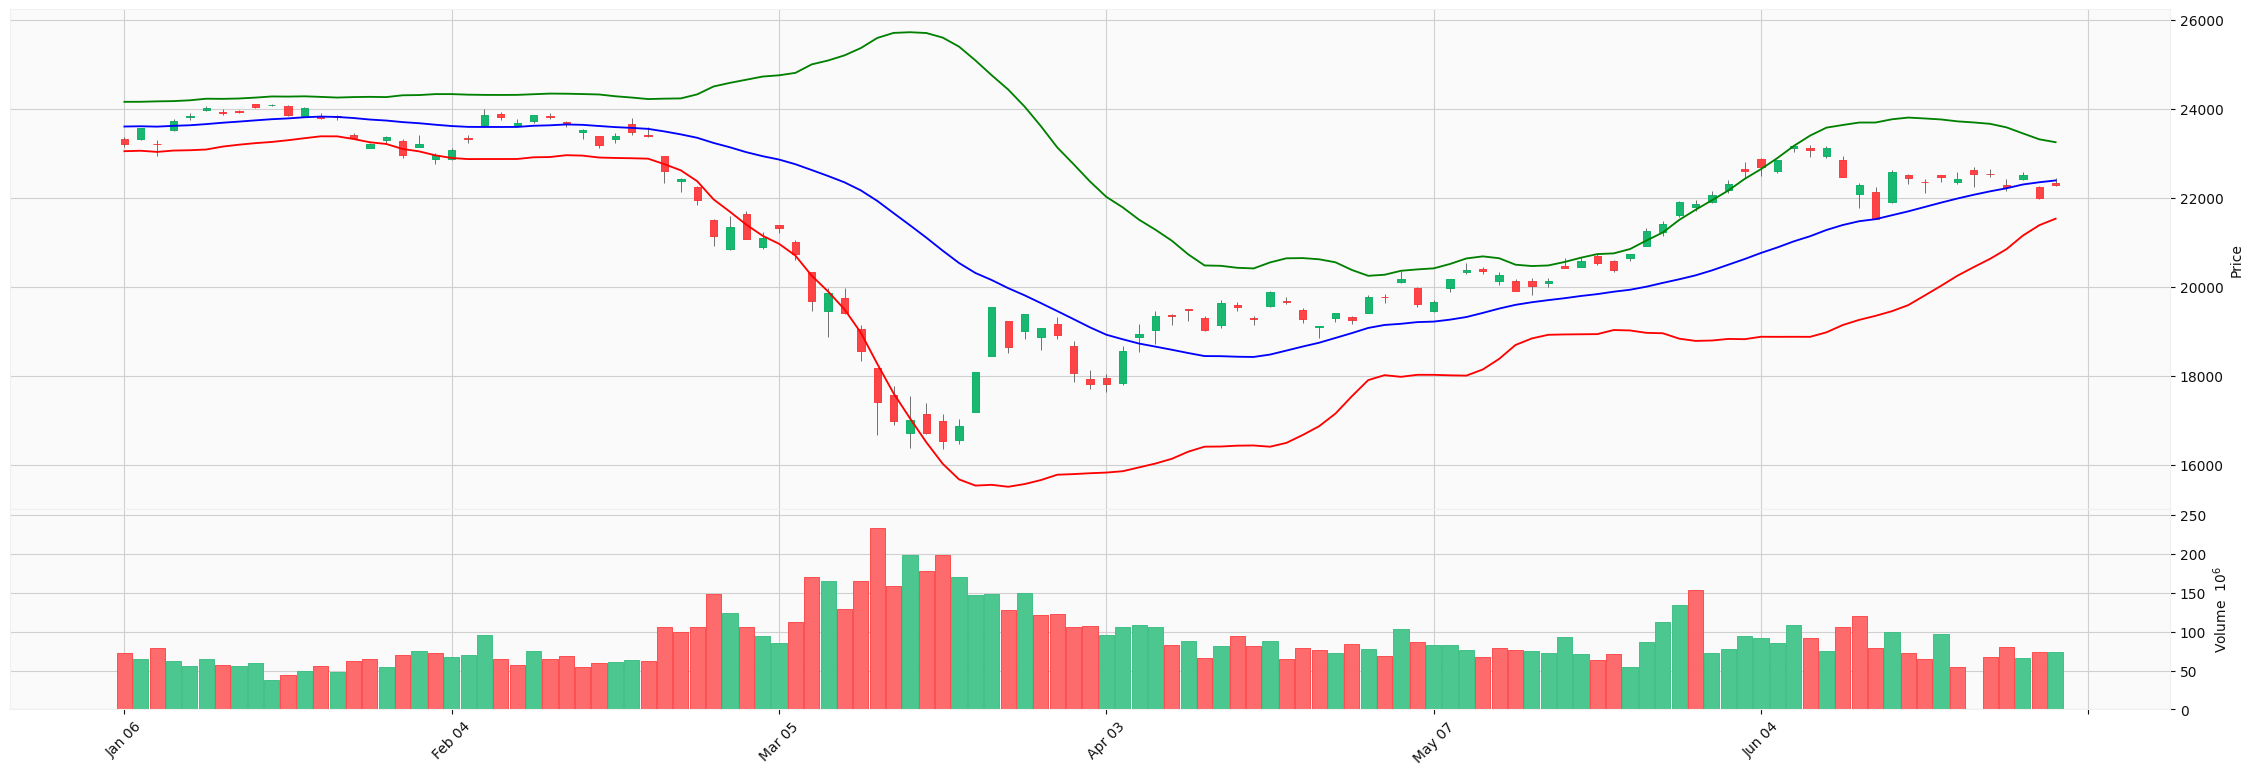

In [50]:
apds=[mpf.make_addplot(df['upper'],color='g'),
      mpf.make_addplot(df['middle'],color='b'),
      mpf.make_addplot(df['lower'],color='r')]

mpf.plot(df,type='candle',
         figsize=(30,10),
         style='yahoo',
         volume=True,
         addplot=apds)


In [51]:
#グラフにMACDを追加する

df['macd'],df['macfsignal'],df['macdhist'] =ta.MACD(df['Adj Close'],
                                                    fastperiod=12,
                                                    slowperiod=26,
                                                    signalperiod=9)
df.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,macd,macfsignal,macdhist
Date,,,,,,,,,,,,
2020-06-24,22663.289062,22479.859375,22541.009766,22534.320312,67000000,22534.320312,23668.783006,22152.969297,20637.155588,419.231405,518.649891,-99.418486
2020-06-25,22423.410156,22165.140625,22287.869141,22259.789062,80800000,22259.789062,23589.084373,22221.268437,20853.452502,375.889013,490.097715,-114.208703
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,23454.238943,22306.225234,21158.211526,357.773441,463.632861,-105.859419
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,23321.613062,22356.360781,21391.108501,298.257702,430.557829,-132.300127
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,23255.768474,22397.039609,21538.310745,271.610935,398.768450,-127.157515


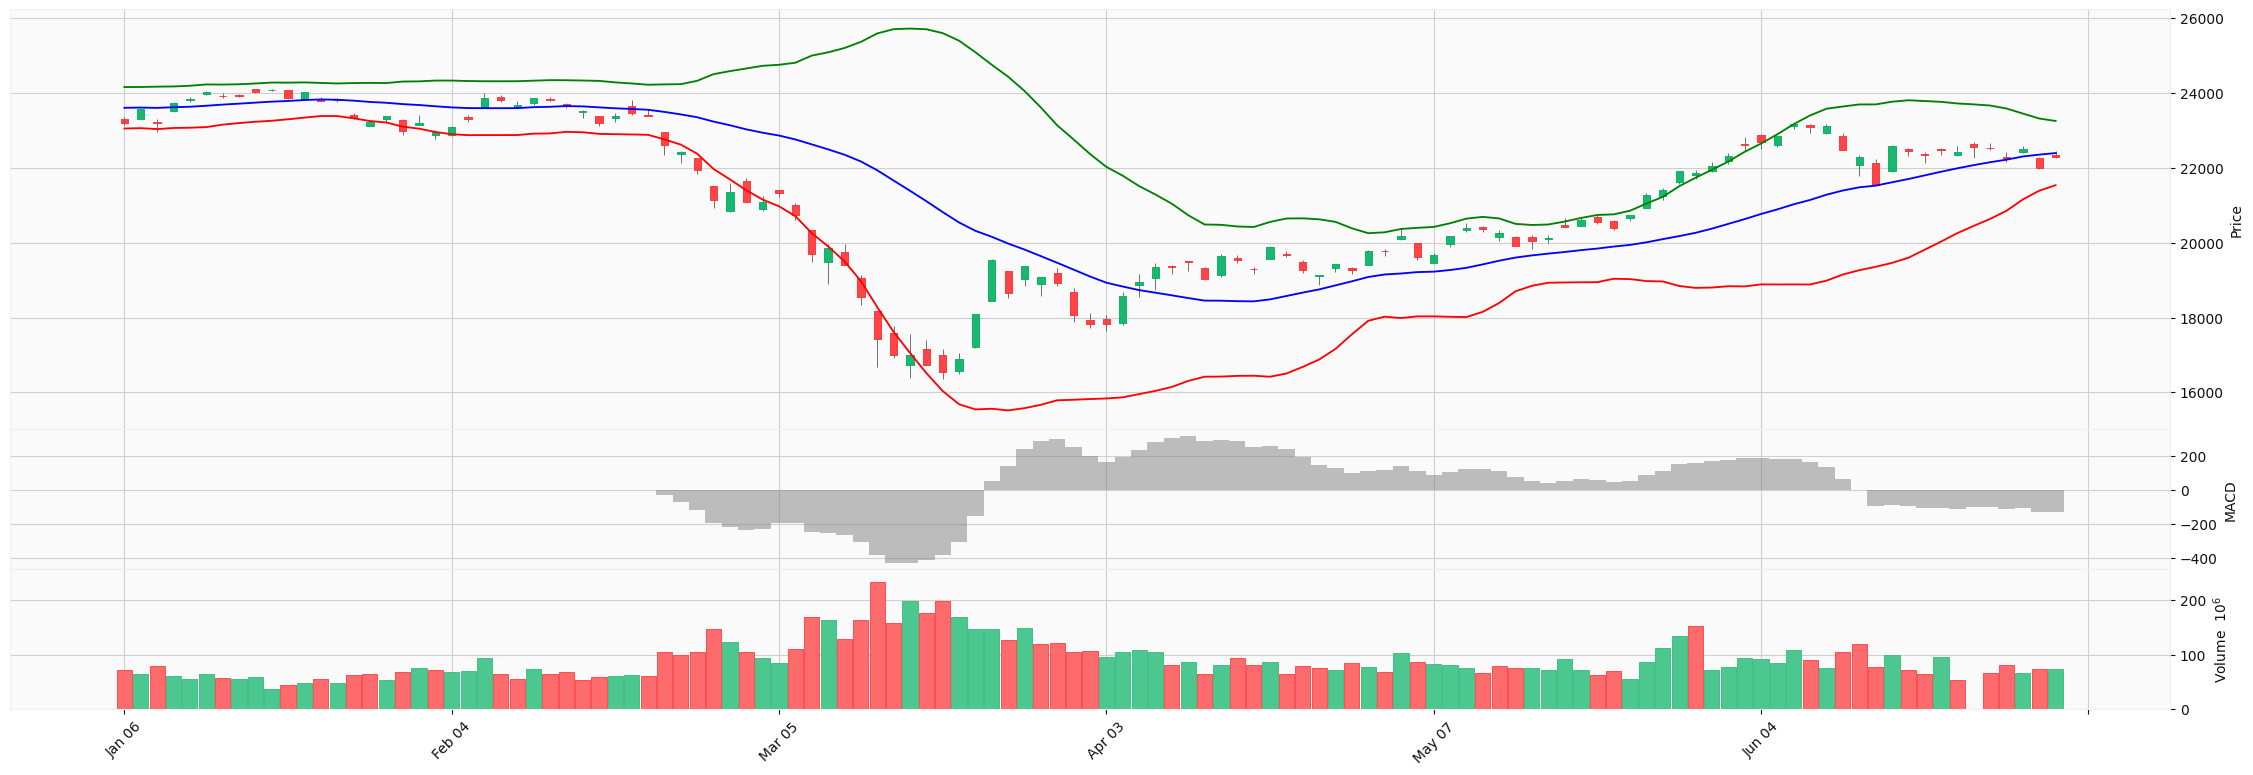

In [52]:
apds=[mpf.make_addplot(df['upper'],color='g'),
      mpf.make_addplot(df['middle'],color='b'),
      mpf.make_addplot(df['lower'],color='r'),
      mpf.make_addplot(df['macdhist'],type='bar',color='grey',
                       width=1.0,panel=1,alpha=0.5,
                       ylabel='MACD')]

mpf.plot(df,type='candle',
         figsize=(30,10),
         style='yahoo',
         volume=True,
         addplot=apds,
         volume_panel=2,panel_ratios=(3,1,1))


In [53]:
#グラフにRSIを追加する。
df['RSI']=ta.RSI(df['Adj Close'],timeperiod=25)
df.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,macd,macfsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2020-06-24,22663.289062,22479.859375,22541.009766,22534.320312,67000000,22534.320312,23668.783006,22152.969297,20637.155588,419.231405,518.649891,-99.418486,58.298703
2020-06-25,22423.410156,22165.140625,22287.869141,22259.789062,80800000,22259.789062,23589.084373,22221.268437,20853.452502,375.889013,490.097715,-114.208703,55.946788
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,23454.238943,22306.225234,21158.211526,357.773441,463.632861,-105.859419,57.584822
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,23321.613062,22356.360781,21391.108501,298.257702,430.557829,-132.300127,53.350032
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,23255.768474,22397.039609,21538.310745,271.610935,398.768450,-127.157515,55.291524


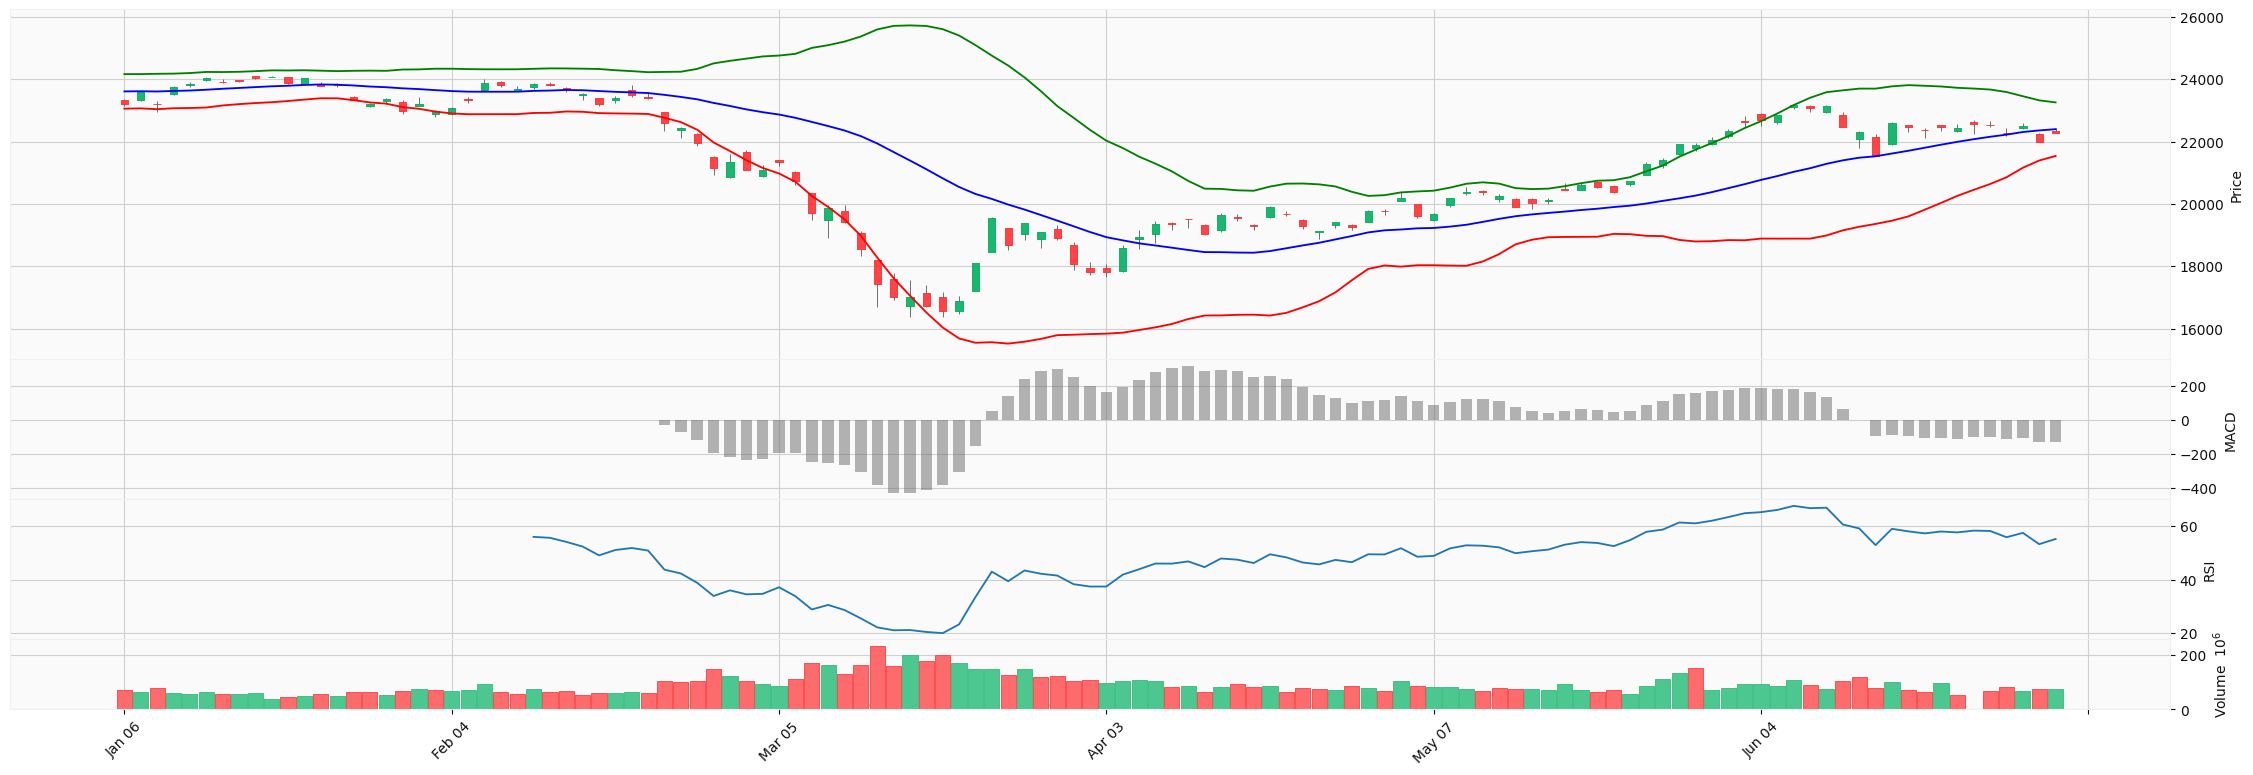

In [54]:
apds = [mpf.make_addplot(df['upper'],color='g'),
        mpf.make_addplot(df['middle'],color='b'),
        mpf.make_addplot(df['lower'],color='r'),
        mpf.make_addplot(df['macdhist'],type='bar',width=0.7,panel=1,color='dimgray',alpha=0.5,ylabel='MACD'),
        mpf.make_addplot(df['RSI'],panel=2,type='line',ylabel='RSI')]

mpf.plot(df,type='candle',
         figsize=(30,10),
         style='yahoo',
         volume=True,
         addplot=apds,
         volume_panel=3,panel_ratios=(5,2,2,1))

In [55]:

mpf.plot(df,type='candle',
         figsize=(30,10),
         style='yahoo',
         volume=True,
         addplot=apds,
         volume_panel=3,panel_ratios=(5,2,2,1),
         savefig='technical.png')

# 一目均衡表の作成と可視化

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf
from pandas_datareader import data

In [57]:
start = '2019-11-01'
end='2020-11-01'

df=data.DataReader('^N225','yahoo',start,end)
date=df.index

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,22852.720703,22705.599609,22730.490234,22850.769531,65400000,22850.769531
2019-11-05,23328.519531,23090.939453,23118.789062,23251.990234,102100000,23251.990234
2019-11-06,23352.560547,23246.570312,23343.509766,23303.820312,77400000,23303.820312
2019-11-07,23336.000000,23253.320312,23283.140625,23330.320312,70900000,23330.320312
2019-11-08,23591.089844,23313.410156,23550.039062,23391.869141,94600000,23391.869141


In [58]:
high=df['High']
low=df['Low']

max26=high.rolling(window=26).max()
min26=high.rolling(window=26).min()

df['basic_line']=(max26+min26)/2

In [59]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,basic_line
Date,,,,,,,
2020-10-26,23572.599609,23475.519531,23520.779297,23494.339844,41700000,23494.339844,23480.150391
2020-10-27,23485.800781,23232.310547,23376.960938,23485.800781,52700000,23485.800781,23480.150391
2020-10-28,23451.029297,23334.230469,23372.609375,23418.509766,67100000,23418.509766,23480.150391
2020-10-29,23374.099609,23170.759766,23170.759766,23331.939453,57500000,23331.939453,23480.150391
2020-10-30,23320.710938,22948.470703,23320.710938,22977.130859,76700000,22977.130859,23480.150391


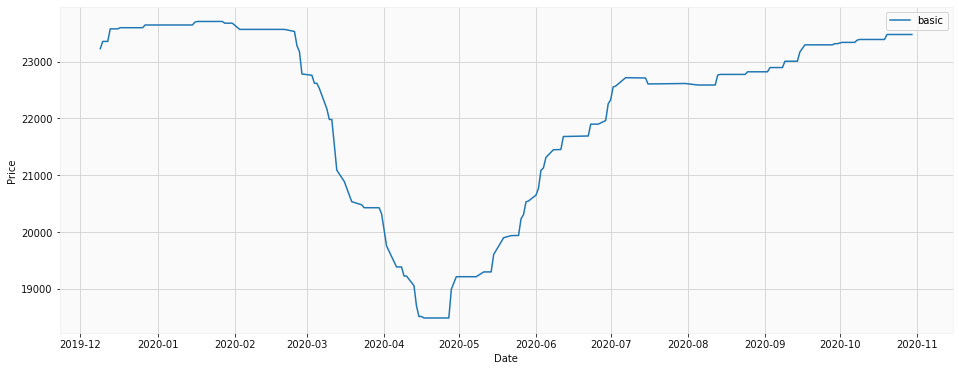

In [60]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'],label='basic')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
#plt.grid()
plt.show()

In [61]:
max9=high.rolling(window=9).max()
min9=high.rolling(window=9).min()

df['turn_line']=(max9+min9)/2
df.tail()

,High,Low,Open,Close,Volume,Adj Close,basic_line,turn_line
Date,,,,,,,,
2020-10-26,23572.599609,23475.519531,23520.779297,23494.339844,41700000,23494.339844,23480.150391,23622.950195
2020-10-27,23485.800781,23232.310547,23376.960938,23485.800781,52700000,23485.800781,23480.150391,23596.480469
2020-10-28,23451.029297,23334.230469,23372.609375,23418.509766,67100000,23418.509766,23480.150391,23579.094727
2020-10-29,23374.099609,23170.759766,23170.759766,23331.939453,57500000,23331.939453,23480.150391,23540.629883
2020-10-30,23320.710938,22948.470703,23320.710938,22977.130859,76700000,22977.130859,23480.150391,23511.505859


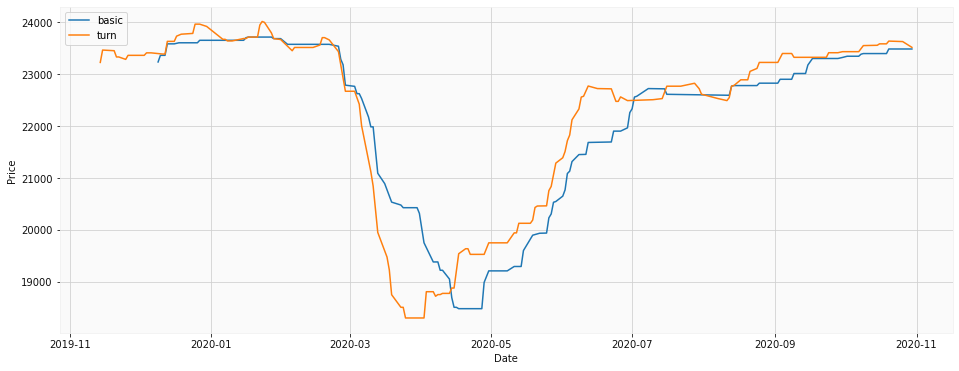

In [62]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'],label='basic')
plt.plot(df['turn_line'],label='turn')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
#plt.grid()
plt.show()

In [63]:
df['span1']=(df['basic_line']+df['turn_line'])/2
df.tail()

,High,Low,Open,Close,Volume,Adj Close,basic_line,turn_line,span1
Date,,,,,,,,,
2020-10-26,23572.599609,23475.519531,23520.779297,23494.339844,41700000,23494.339844,23480.150391,23622.950195,23551.550293
2020-10-27,23485.800781,23232.310547,23376.960938,23485.800781,52700000,23485.800781,23480.150391,23596.480469,23538.315430
2020-10-28,23451.029297,23334.230469,23372.609375,23418.509766,67100000,23418.509766,23480.150391,23579.094727,23529.622559
2020-10-29,23374.099609,23170.759766,23170.759766,23331.939453,57500000,23331.939453,23480.150391,23540.629883,23510.390137
2020-10-30,23320.710938,22948.470703,23320.710938,22977.130859,76700000,22977.130859,23480.150391,23511.505859,23495.828125


In [64]:
max52=high.rolling(window=52).max()
min52=high.rolling(window=52).min()

df['span2']=(max52+min52)/2
df.tail()

,High,Low,Open,Close,Volume,Adj Close,basic_line,turn_line,span1,span2
Date,,,,,,,,,,
2020-10-26,23572.599609,23475.519531,23520.779297,23494.339844,41700000,23494.339844,23480.150391,23622.950195,23551.550293,23243.224609
2020-10-27,23485.800781,23232.310547,23376.960938,23485.800781,52700000,23485.800781,23480.150391,23596.480469,23538.315430,23299.974609
2020-10-28,23451.029297,23334.230469,23372.609375,23418.509766,67100000,23418.509766,23480.150391,23579.094727,23529.622559,23369.145508
2020-10-29,23374.099609,23170.759766,23170.759766,23331.939453,57500000,23331.939453,23480.150391,23540.629883,23510.390137,23369.145508
2020-10-30,23320.710938,22948.470703,23320.710938,22977.130859,76700000,22977.130859,23480.150391,23511.505859,23495.828125,23369.145508


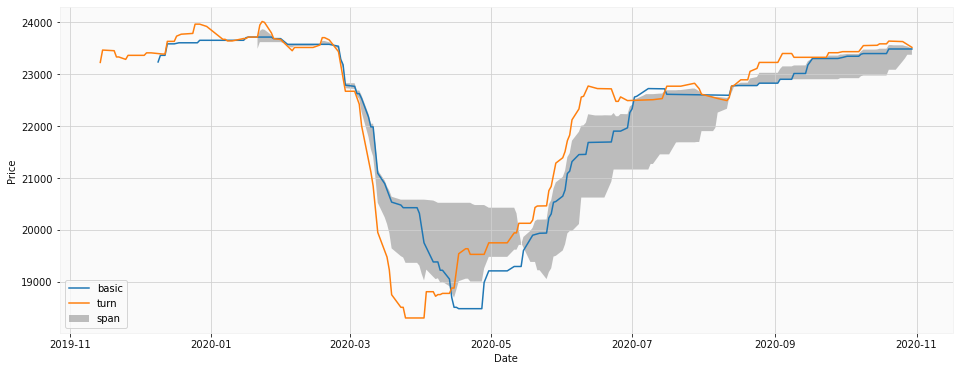

In [65]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'],label='basic')
plt.plot(df['turn_line'],label='turn')
plt.fill_between(date,df['span1'],df['span2'],facecolor='gray',alpha=0.5,label='span')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
#plt.grid()
plt.show()

In [66]:
df['slow_line']=df['Adj Close'].shift(-25)
df.head()

,High,Low,Open,Close,Volume,Adj Close,basic_line,turn_line,span1,span2,slow_line
Date,,,,,,,,,,,
2019-11-01,22852.720703,22705.599609,22730.490234,22850.769531,65400000,22850.769531,NaN,NaN,NaN,NaN,23430.699219
2019-11-05,23328.519531,23090.939453,23118.789062,23251.990234,102100000,23251.990234,NaN,NaN,NaN,NaN,23410.189453
2019-11-06,23352.560547,23246.570312,23343.509766,23303.820312,77400000,23303.820312,NaN,NaN,NaN,NaN,23391.859375
2019-11-07,23336.000000,23253.320312,23283.140625,23330.320312,70900000,23330.320312,NaN,NaN,NaN,NaN,23424.810547
2019-11-08,23591.089844,23313.410156,23550.039062,23391.869141,94600000,23391.869141,NaN,NaN,NaN,NaN,24023.099609


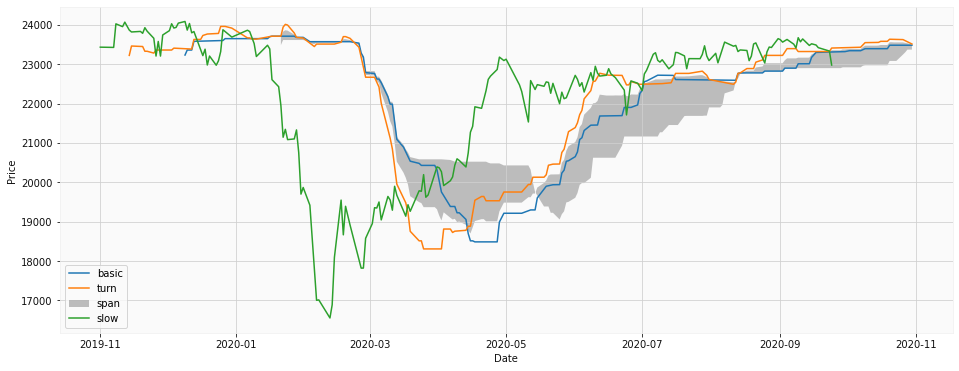

In [67]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'],label='basic')
plt.plot(df['turn_line'],label='turn')
plt.fill_between(date,df['span1'],df['span2'],facecolor='gray',alpha=0.5,label='span')
plt.plot(df['slow_line'],label='slow')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
#plt.grid()
plt.show()

## ローソク足の追加

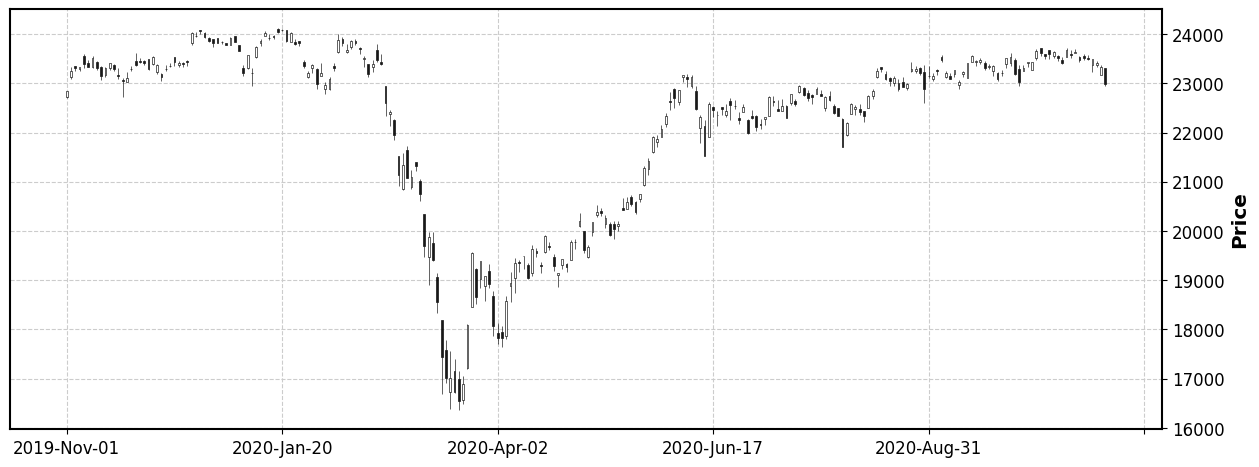

In [68]:
mpf.plot(df,type='candle',figsize=(16,6),style='classic',xrotation=0)

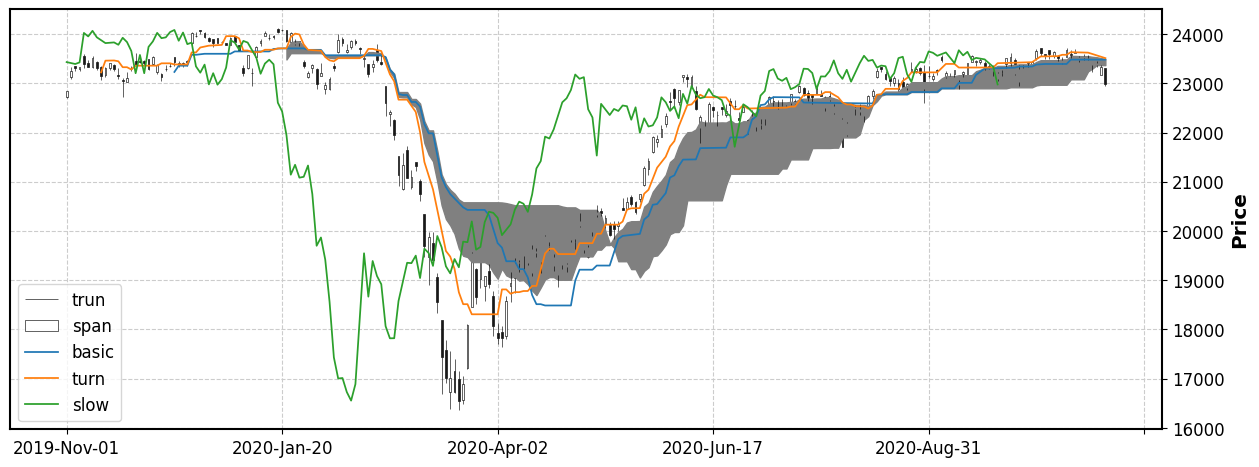

In [69]:
lines = [mpf.make_addplot(df['basic_line']), #基準線
         mpf.make_addplot(df['turn_line']), #転換線
         mpf.make_addplot(df['slow_line']) #遅行線
        ]

labels = ['trun','span','basic','turn','slow']

fig, ax = mpf.plot(df,type='candle',figsize=(16,6),
                   style='classic',xrotation=0,
                   addplot=lines,returnfig=True,
                   fill_between=dict(y1=df['span1'].values,y2=df['span2'].values,color='gray'))

ax[0].legend(labels)
plt.show()

In [70]:
#グラフの保存
lines = [mpf.make_addplot(df['basic_line']), #基準線
         mpf.make_addplot(df['turn_line']), #転換線
         mpf.make_addplot(df['slow_line']) #遅行線
        ]

labels = ['trun','span','basic','turn','slow']

fig, ax = mpf.plot(df,type='candle',figsize=(16,6),
                   style='classic',xrotation=0,
                   addplot=lines,returnfig=True,
                   fill_between=dict(y1=df['span1'].values,y2=df['span2'].values,color='gray'),
                   savefig='ichimoku.png')

ax[0].legend(labels)

# 株価予測(分類予測)

In [71]:
import pandas as pd

In [72]:
#日経平均株価データ(1965-01-05 ~ 2021-10-21)
df = pd.read_csv('finance_dataset.csv')
df.tail()

,Date,High,Low,Open,Close
13962,2021-10-15,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06
13963,2021-10-18,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
13964,2021-10-19,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
13965,2021-10-20,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06
13966,2021-10-21,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06


### 週番号  
### 曜日  
### 目的変数の追加

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13967 entries, 0 to 13966
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13967 non-null  object 
 1   High    13967 non-null  float64
 2   Low     13967 non-null  float64
 3   Open    13967 non-null  float64
 4   Close   13967 non-null  float64
dtypes: float64(4), object(1)
memory usage: 545.7+ KB


In [74]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13967 entries, 0 to 13966
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13967 non-null  datetime64[ns]
 1   High    13967 non-null  float64       
 2   Low     13967 non-null  float64       
 3   Open    13967 non-null  float64       
 4   Close   13967 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 545.7 KB


In [75]:
df['weekday']=df['Date'].dt.weekday
df.head()

,Date,High,Low,Open,Close,weekday
0,1965-01-05,116339.097290,116339.097290,116339.097290,116339.097290,1
1,1965-01-06,116919.074097,116919.074097,116919.074097,116919.074097,2
2,1965-01-07,117869.976807,117869.976807,117869.976807,117869.976807,3
3,1965-01-08,118994.779968,118994.779968,118994.779968,118994.779968,4
4,1965-01-12,119189.953613,119189.953613,119189.953613,119189.953613,1


In [76]:
from datetime import datetime
from datetime import timedelta
start = datetime(1965,1,4)
df['weeks']=(df['Date']-start)//timedelta(weeks=1)
df.head()

,Date,High,Low,Open,Close,weekday,weeks
0,1965-01-05,116339.097290,116339.097290,116339.097290,116339.097290,1,0
1,1965-01-06,116919.074097,116919.074097,116919.074097,116919.074097,2,0
2,1965-01-07,117869.976807,117869.976807,117869.976807,117869.976807,3,0
3,1965-01-08,118994.779968,118994.779968,118994.779968,118994.779968,4,0
4,1965-01-12,119189.953613,119189.953613,119189.953613,119189.953613,1,1


In [77]:
df = df[['Date','weeks','weekday','High','Low','Open','Close']]
df.head()

,Date,weeks,weekday,High,Low,Open,Close
0,1965-01-05,0,1,116339.097290,116339.097290,116339.097290,116339.097290
1,1965-01-06,0,2,116919.074097,116919.074097,116919.074097,116919.074097
2,1965-01-07,0,3,117869.976807,117869.976807,117869.976807,117869.976807
3,1965-01-08,0,4,118994.779968,118994.779968,118994.779968,118994.779968
4,1965-01-12,1,1,119189.953613,119189.953613,119189.953613,119189.953613


In [78]:
df.set_index(keys='Date',inplace=True)



In [79]:
df.head()

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0,1,116339.097290,116339.097290,116339.097290,116339.097290
1965-01-06,0,2,116919.074097,116919.074097,116919.074097,116919.074097
1965-01-07,0,3,117869.976807,117869.976807,117869.976807,117869.976807
1965-01-08,0,4,118994.779968,118994.779968,118994.779968,118994.779968
1965-01-12,1,1,119189.953613,119189.953613,119189.953613,119189.953613


In [80]:
df_shift=df.shift(-1)
df_shift.tail()

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
2021-10-15,2963.0,0.0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06
2021-10-18,2963.0,1.0,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06
2021-10-19,2963.0,2.0,2.727743e+06,2.703065e+06,2.718200e+06,2.706138e+06
2021-10-20,2963.0,3.0,2.702926e+06,2.658233e+06,2.696628e+06,2.663157e+06
2021-10-21,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df['delta_Close']=df_shift['Close']-df['Close']
df.head()

,weeks,weekday,High,Low,Open,Close,delta_Close
Date,,,,,,,
1965-01-05,0,1,116339.097290,116339.097290,116339.097290,116339.097290,579.976807
1965-01-06,0,2,116919.074097,116919.074097,116919.074097,116919.074097,950.902710
1965-01-07,0,3,117869.976807,117869.976807,117869.976807,117869.976807,1124.803162
1965-01-08,0,4,118994.779968,118994.779968,118994.779968,118994.779968,195.173645
1965-01-12,1,1,119189.953613,119189.953613,119189.953613,119189.953613,-635.474548


In [82]:
df['Up']=0
df['Up'][df['delta_Close']>0]=1
df=df.drop('delta_Close',axis=1)
df.head()

,weeks,weekday,High,Low,Open,Close,Up
Date,,,,,,,
1965-01-05,0,1,116339.097290,116339.097290,116339.097290,116339.097290,1
1965-01-06,0,2,116919.074097,116919.074097,116919.074097,116919.074097,1
1965-01-07,0,3,117869.976807,117869.976807,117869.976807,117869.976807,1
1965-01-08,0,4,118994.779968,118994.779968,118994.779968,118994.779968,1
1965-01-12,1,1,119189.953613,119189.953613,119189.953613,119189.953613,0


## データの全体像を掴む

<AxesSubplot: xlabel='Date'>

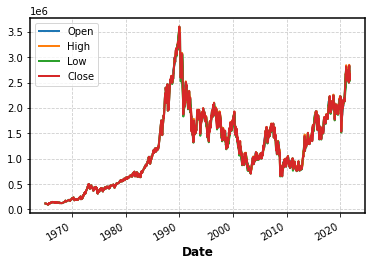

In [83]:
df_new=df[['Open','High','Low','Close']]

from matplotlib import pyplot as plt
%matplotlib inline

df_new.plot(kind='line')

## 特徴量の追加  
*  終値の前日比率  
*  始値・終値の差分

In [84]:
df_shift = df.shift(1)

df['Close_ratio']=(df['Close']-df_shift['Close'])/df_shift['Close']
df.head()

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio
Date,,,,,,,,
1965-01-05,0,1,116339.097290,116339.097290,116339.097290,116339.097290,1,NaN
1965-01-06,0,2,116919.074097,116919.074097,116919.074097,116919.074097,1,0.004985
1965-01-07,0,3,117869.976807,117869.976807,117869.976807,117869.976807,1,0.008133
1965-01-08,0,4,118994.779968,118994.779968,118994.779968,118994.779968,1,0.009543
1965-01-12,1,1,119189.953613,119189.953613,119189.953613,119189.953613,0,0.001640


In [85]:
df['Body']=df['Open']-df['Close']
df.head()

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,,,
1965-01-05,0,1,116339.097290,116339.097290,116339.097290,116339.097290,1,NaN,0.0
1965-01-06,0,2,116919.074097,116919.074097,116919.074097,116919.074097,1,0.004985,0.0
1965-01-07,0,3,117869.976807,117869.976807,117869.976807,117869.976807,1,0.008133,0.0
1965-01-08,0,4,118994.779968,118994.779968,118994.779968,118994.779968,1,0.009543,0.0
1965-01-12,1,1,119189.953613,119189.953613,119189.953613,119189.953613,0,0.001640,0.0


## 目的  
### 月~木曜日までの情報を元に、金曜日の始まり値が上がるか下がるかの予測モデルを作成する

### 週番号のリストを作成

In [86]:
list_weeks = []
list_weeks = df['weeks'].unique()
list_weeks

array([   0,    1,    2, ..., 2961, 2962, 2963], dtype=int64)

### 同じ週番号を数えて、データフレームに追加

In [87]:
df['week_days']=0

for i in list_weeks:
    df['week_days'][df['weeks']==i] = len(df[df['weeks']== i])
    
df.head()

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-05,0,1,116339.097290,116339.097290,116339.097290,116339.097290,1,NaN,0.0,4
1965-01-06,0,2,116919.074097,116919.074097,116919.074097,116919.074097,1,0.004985,0.0,4
1965-01-07,0,3,117869.976807,117869.976807,117869.976807,117869.976807,1,0.008133,0.0,4
1965-01-08,0,4,118994.779968,118994.779968,118994.779968,118994.779968,1,0.009543,0.0,4
1965-01-12,1,1,119189.953613,119189.953613,119189.953613,119189.953613,0,0.001640,0.0,3


### 5日分のデータがある週だけを残す

In [88]:
df=df[df['week_days']==5]
df.head()

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-18,2,0,117630.404968,117630.404968,117630.404968,117630.404968,0,-0.013819,0.0,5
1965-01-19,2,1,117506.446838,117506.446838,117506.446838,117506.446838,0,-0.001054,0.0,5
1965-01-20,2,2,117371.400452,117371.400452,117371.400452,117371.400452,1,-0.001149,0.0,5
1965-01-21,2,3,117517.546387,117517.546387,117517.546387,117517.546387,0,0.001245,0.0,5
1965-01-22,2,4,116719.270935,116719.270935,116719.270935,116719.270935,0,-0.006793,0.0,5


In [89]:
df[df['weekday']!=4]
df.head()

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-18,2,0,117630.404968,117630.404968,117630.404968,117630.404968,0,-0.013819,0.0,5
1965-01-19,2,1,117506.446838,117506.446838,117506.446838,117506.446838,0,-0.001054,0.0,5
1965-01-20,2,2,117371.400452,117371.400452,117371.400452,117371.400452,1,-0.001149,0.0,5
1965-01-21,2,3,117517.546387,117517.546387,117517.546387,117517.546387,0,0.001245,0.0,5
1965-01-22,2,4,116719.270935,116719.270935,116719.270935,116719.270935,0,-0.006793,0.0,5


In [90]:
df=df[['weekday','High','Low','Open','Close','Close_ratio','Body','Up']]
df.head()

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
1965-01-18,0,117630.404968,117630.404968,117630.404968,117630.404968,-0.013819,0.0,0
1965-01-19,1,117506.446838,117506.446838,117506.446838,117506.446838,-0.001054,0.0,0
1965-01-20,2,117371.400452,117371.400452,117371.400452,117371.400452,-0.001149,0.0,1
1965-01-21,3,117517.546387,117517.546387,117517.546387,117517.546387,0.001245,0.0,0
1965-01-22,4,116719.270935,116719.270935,116719.270935,116719.270935,-0.006793,0.0,0


### 学習データと検証データに分割

In [91]:
df_train=df['2018-01-01':'2020-12-31']
df_train.tail()

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2020-12-21,0,2.488774e+06,2.454361e+06,2.482154e+06,2.471084e+06,-0.001830,11070.371094,0
2020-12-22,1,2.464199e+06,2.438454e+06,2.456738e+06,2.445366e+06,-0.010407,11371.899414,1
2020-12-23,2,2.459132e+06,2.443363e+06,2.458690e+06,2.453543e+06,0.003344,5146.757812,1
2020-12-24,3,2.475719e+06,2.460987e+06,2.463748e+06,2.466822e+06,0.005412,-3074.721680,0
2020-12-25,4,2.471286e+06,2.464041e+06,2.470499e+06,2.465736e+06,-0.000440,4762.846680,1


In [92]:
df_val=df['2021-01-01':]
df_val.tail()

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2021-10-11,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0.016017,-48158.173828,0
2021-10-12,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,-0.009390,21115.112305,0
2021-10-13,2,2.623762e+06,2.589395e+06,2.597903e+06,2.602976e+06,-0.003200,-5072.685547,1
2021-10-14,3,2.643343e+06,2.611646e+06,2.614458e+06,2.640961e+06,0.014593,-26503.056641,1
2021-10-15,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0.018133,-26026.826172,0


In [93]:
x_train=df_train[['weekday','High','Low','Open','Close','Close_ratio','Body']]
y_train=df_train['Up']


In [94]:
x_val=df_val[['weekday','High','Low','Open','Close','Close_ratio','Body']]
y_val=df_val['Up']

#print(x_val)
#print(y_val)

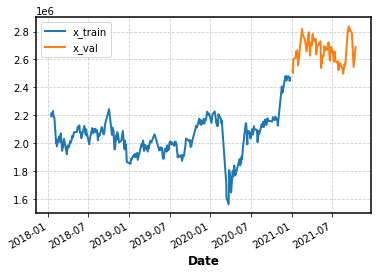

In [95]:
x_train['Close'].plot(kind='line')
x_val['Close'].plot(kind='line')

plt.legend(['x_train','x_val'])

plt.show()

### データを整える

In [96]:
from sklearn.preprocessing import StandardScaler

import numpy as np

def std_to_np(df):
    df_list=[]
    df=np.array(df)
    for i in range(0,len(df)-3,4):
        df_s=df[i:i+4]
        scl=StandardScaler()
        df_std=scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

In [97]:
#!pip install tensorflow

In [98]:
x_train_np_array=std_to_np(x_train)
x_val_np_array=std_to_np(x_val)

print(x_train_np_array.shape)
print(x_val_np_array.shape)

(150, 4, 7)
(41, 4, 7)


In [99]:
print(y_train.shape)
print(y_val.shape)

(600,)
(165,)


In [100]:
y_train_new=y_train[3::4]
y_val_new=y_val[3::4]

print(len(y_train_new))
print(len(y_val_new))

150
41


### 予測モデルの作成

In [101]:
#!pip install tensorflow

In [102]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Dropout

In [103]:
def lstm_comp(df):
    model=Sequential()
    model.add(LSTM(256,activation='relu',batch_input_shape=(None,df.shape[1],df.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

### 交差検証  
予測モデルが使用できるかの確認

In [104]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score

In [105]:
valid_scores=[]
tscv=TimeSeriesSplit(n_splits=4)

for fold,(train_indices,valid_indices) in enumerate(tscv.split(x_train_np_array)):
    x_train,x_valid=x_train_np_array[train_indices],x_train_np_array[valid_indices]
    y_train,y_valid=y_train_new[train_indices],y_train_new[valid_indices]
    
    model=lstm_comp(x_train)
    
    model.fit(x_train,y_train,epochs=10,batch_size=64)
    
    y_valid_pred=model.predict(x_valid)
    
    y_valid_pred=np.where(y_valid_pred<0.5,0,1)
    
    score=accuracy_score(y_valid,y_valid_pred)
    print(f'fold{fold}MAE:{score}')
    
    valid_scores.append(score)

print(f'valid_scores:{valid_scores}')
cv_score=np.mean(valid_scores)
print(f'CV score:{cv_score}')

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6928 - accuracy: 0.5333
Epoch 2/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6870 - accuracy: 0.5667
Epoch 3/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6768 - accuracy: 0.5667
Epoch 4/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6738 - accuracy: 0.5667
Epoch 5/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6716 - accuracy: 0.5667
Epoch 6/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6721 - accuracy: 0.5667
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6673 - accuracy: 0.5667
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6722 - accuracy: 0.5667
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6699 - accuracy: 0.5667
Epoch 10/10
1/1 [==============================] - 0s 242ms/step
fold0MAE:0.5666666666666667
Epoch 1/10
1/1 [====================

#### モデルを用いた予測

In [106]:
model=lstm_comp(x_train_np_array)

In [107]:
result=model.fit(x_train_np_array,y_train_new,epochs=10,batch_size=64)

Epoch 1/10
3/3 [==============================] - 2s 16ms/step - loss: 0.6924 - accuracy: 0.5667
Epoch 2/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6891 - accuracy: 0.5400
Epoch 3/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6875 - accuracy: 0.5333
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6912 - accuracy: 0.5267
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6856 - accuracy: 0.5267
Epoch 6/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6871 - accuracy: 0.5267
Epoch 7/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6854 - accuracy: 0.5200
Epoch 8/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6787 - accuracy: 0.5933
Epoch 9/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6781 - accuracy: 0.6333
Epoch 10/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6748 - accuracy: 0.6400


In [108]:
pred=model.predict(x_val_np_array)
pred[:10]

2/2 [==============================] - 0s 6ms/step


array([[0.43077144],
       [0.5160533 ],
       [0.5278367 ],
       [0.4670265 ],
       [0.49309292],
       [0.5278731 ],
       [0.45368886],
       [0.4155443 ],
       [0.49713653],
       [0.54674834]], dtype=float32)

In [109]:
pred=np.where(pred<0.5,0,1)
pred[:10]

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [110]:
print('accuracy=',accuracy_score(y_true=y_val_new,y_pred=pred))

accuracy= 0.43902439024390244


In [111]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

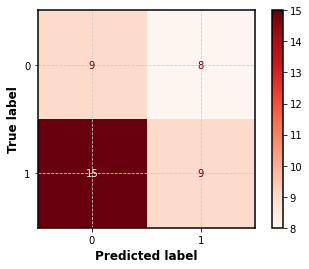

In [112]:
cm=confusion_matrix(y_val_new,pred)
cmp=ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Reds)

## 株価がいくらになるか予測  
重回帰分析を用いる

In [1]:
from datetime import datetime,timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_rows',10)

In [3]:
start ='2018-01-01'
end ='2021-12-31'
data_master=data.DataReader('^N225','yahoo',start,end)
data_master

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078
2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297
2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234
2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219
2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688
...,...,...,...,...,...,...
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000.0,29069.160156


In [4]:
data_master['weekday']=data_master.index.weekday
data_master

,High,Low,Open,Close,Volume,Adj Close,weekday
Date,,,,,,,
2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078,3
2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297,4
2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234,1
2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219,2
2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688,3
...,...,...,...,...,...,...,...
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844,4
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938,0
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000.0,29069.160156,1


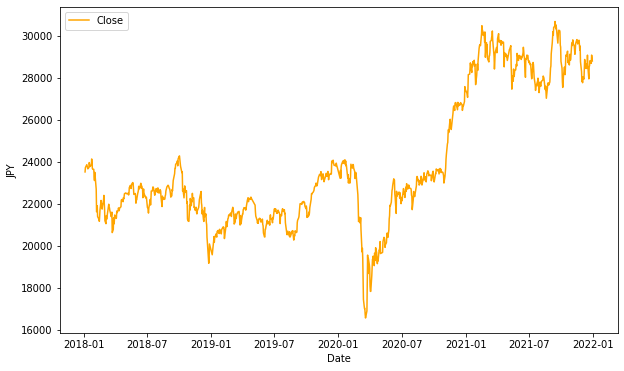

In [9]:
plt.figure(figsize=(10,6))
plt.plot(data_master['Close'],label='Close',color='orange')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
plt.show()

### 説明変数の追加(移動平均、実態、終値の前日差分)

In [10]:
data_technical=data_master.copy()

In [14]:
sma1=5
sma2=10
sma3=15

data_technical['sma1']=data_technical['Close'].rolling(sma1).mean()
data_technical['sma2']=data_technical['Close'].rolling(sma2).mean()
data_technical['sma3']=data_technical['Close'].rolling(sma3).mean()


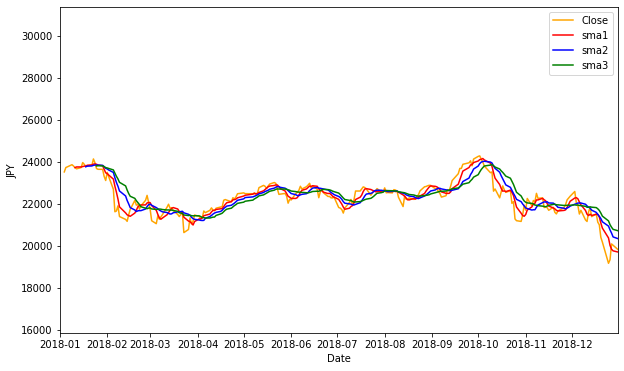

In [15]:
plt.figure(figsize=(10,6))

plt.plot(data_technical['Close'],label='Close',color='orange')
plt.plot(data_technical['sma1'],label='sma1',color='red')
plt.plot(data_technical['sma2'],label='sma2',color='blue')
plt.plot(data_technical['sma3'],label='sma3',color='green')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
xmin=datetime(2018,1,1)
xmax=datetime(2018,12,31)
plt.xlim([xmin,xmax])
plt.show()

In [16]:
data_technical['Body']=data_technical['Open']-data_technical['Close']

data_technical['Close_diff']=data_technical['Close'].diff(1)

data_technical['Close_next']=data_technical['Close'].shift(-1)
data_technical

,High,Low,Open,Close,Volume,Adj Close,weekday,sma1,sma2,sma3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,,
2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078,3,NaN,NaN,NaN,-432.599609,NaN,23714.529297
2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297,4,NaN,NaN,NaN,-71.529297,208.199219,23849.990234
2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234,1,NaN,NaN,NaN,98.980469,135.460938,23788.199219
2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219,2,NaN,NaN,NaN,44.611328,-61.791016,23710.429688
2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688,3,23713.895703,NaN,NaN,-54.039062,-77.769531,23653.820312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844,4,28519.714062,28574.342187,28543.350000,53.460938,-15.779297,28676.460938
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938,0,28667.444141,28577.939258,28593.289453,109.869141,-106.128906,29069.160156
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000.0,29069.160156,1,28777.758203,28641.591211,28634.193490,-115.839844,392.699219,28906.880859


In [17]:
data_technical=data_technical.dropna(how='any')
data_technical

,High,Low,Open,Close,Volume,Adj Close,weekday,sma1,sma2,sma3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,,
2018-01-25,23828.400391,23649.029297,23750.650391,23669.490234,81500000.0,23669.490234,3,23871.762109,23831.103125,23792.033984,81.160156,-271.289062,23631.880859
2018-01-26,23797.960938,23592.279297,23757.339844,23631.880859,87200000.0,23631.880859,4,23836.526172,23828.909180,23800.404036,125.458984,-37.609375,23629.339844
2018-01-29,23787.230469,23580.169922,23707.140625,23629.339844,68800000.0,23629.339844,0,23799.128125,23820.355078,23794.724740,77.800781,-2.541016,23291.970703
2018-01-30,23581.980469,23233.369141,23559.330078,23291.970703,88800000.0,23291.970703,1,23632.692188,23754.371094,23757.523438,267.359375,-337.369141,23098.289062
2018-01-31,23375.380859,23092.849609,23205.230469,23098.289062,99800000.0,23098.289062,2,23464.194141,23677.366016,23711.529427,106.941406,-193.681641,23486.109375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,28798.369141,28640.150391,28703.009766,28798.369141,43600000.0,28798.369141,3,28472.332031,28539.860156,28493.148698,-95.359375,236.158203,28782.589844
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844,4,28519.714062,28574.342187,28543.350000,53.460938,-15.779297,28676.460938
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938,0,28667.444141,28577.939258,28593.289453,109.869141,-106.128906,29069.160156


In [18]:
data_technical=data_technical[data_technical['weekday']==3]
data_technical

,High,Low,Open,Close,Volume,Adj Close,weekday,sma1,sma2,sma3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,,
2018-01-25,23828.400391,23649.029297,23750.650391,23669.490234,81500000.0,23669.490234,3,23871.762109,23831.103125,23792.033984,81.160156,-271.289062,23631.880859
2018-02-01,23492.769531,23211.119141,23276.099609,23486.109375,101800000.0,23486.109375,3,23427.517969,23649.640039,23696.574740,-210.009766,387.820312,23274.529297
2018-02-08,21977.029297,21649.699219,21721.570312,21890.859375,104700000.0,21890.859375,3,22220.615625,22824.066797,23173.298568,-169.289062,245.490234,21382.619141
2018-02-15,21578.990234,21308.919922,21384.099609,21464.980469,86400000.0,21464.980469,3,21427.461719,21983.563672,22477.107161,-80.880859,310.810547,21720.250000
2018-02-22,21799.400391,21626.849609,21789.880859,21736.439453,77300000.0,21736.439453,3,21900.362109,21663.911914,21955.829818,53.441406,-234.371094,21892.779297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29570.419922,29444.449219,29469.650391,29499.279297,50700000.0,29499.279297,3,29584.115625,29608.165820,29559.125911,-29.628906,196.619141,28751.619141
2021-12-02,27938.550781,27644.960938,27716.199219,27753.369141,77400000.0,27753.369141,3,28109.257422,28846.686523,29108.529687,-37.169922,-182.250000,28029.570312
2021-12-09,28908.289062,28725.470703,28827.320312,28725.470703,54400000.0,28725.470703,3,28399.725781,28254.491602,28697.699609,101.849609,-135.148438,28437.769531


In [19]:
data_technical=data_technical[['High','Low','Open','Close','Volume','Adj Close','sma1','sma2','sma3','Body','Close_diff','Close_next']]
data_technical

,High,Low,Open,Close,Volume,Adj Close,sma1,sma2,sma3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,
2018-01-25,23828.400391,23649.029297,23750.650391,23669.490234,81500000.0,23669.490234,23871.762109,23831.103125,23792.033984,81.160156,-271.289062,23631.880859
2018-02-01,23492.769531,23211.119141,23276.099609,23486.109375,101800000.0,23486.109375,23427.517969,23649.640039,23696.574740,-210.009766,387.820312,23274.529297
2018-02-08,21977.029297,21649.699219,21721.570312,21890.859375,104700000.0,21890.859375,22220.615625,22824.066797,23173.298568,-169.289062,245.490234,21382.619141
2018-02-15,21578.990234,21308.919922,21384.099609,21464.980469,86400000.0,21464.980469,21427.461719,21983.563672,22477.107161,-80.880859,310.810547,21720.250000
2018-02-22,21799.400391,21626.849609,21789.880859,21736.439453,77300000.0,21736.439453,21900.362109,21663.911914,21955.829818,53.441406,-234.371094,21892.779297
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29570.419922,29444.449219,29469.650391,29499.279297,50700000.0,29499.279297,29584.115625,29608.165820,29559.125911,-29.628906,196.619141,28751.619141
2021-12-02,27938.550781,27644.960938,27716.199219,27753.369141,77400000.0,27753.369141,28109.257422,28846.686523,29108.529687,-37.169922,-182.250000,28029.570312
2021-12-09,28908.289062,28725.470703,28827.320312,28725.470703,54400000.0,28725.470703,28399.725781,28254.491602,28697.699609,101.849609,-135.148438,28437.769531


In [20]:
#学習データとテストデータに分ける
train=data_technical['2018-01-01':'2020-12-31']
train

,High,Low,Open,Close,Volume,Adj Close,sma1,sma2,sma3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,
2018-01-25,23828.400391,23649.029297,23750.650391,23669.490234,81500000.0,23669.490234,23871.762109,23831.103125,23792.033984,81.160156,-271.289062,23631.880859
2018-02-01,23492.769531,23211.119141,23276.099609,23486.109375,101800000.0,23486.109375,23427.517969,23649.640039,23696.574740,-210.009766,387.820312,23274.529297
2018-02-08,21977.029297,21649.699219,21721.570312,21890.859375,104700000.0,21890.859375,22220.615625,22824.066797,23173.298568,-169.289062,245.490234,21382.619141
2018-02-15,21578.990234,21308.919922,21384.099609,21464.980469,86400000.0,21464.980469,21427.461719,21983.563672,22477.107161,-80.880859,310.810547,21720.250000
2018-02-22,21799.400391,21626.849609,21789.880859,21736.439453,77300000.0,21736.439453,21900.362109,21663.911914,21955.829818,53.441406,-234.371094,21892.779297
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,26560.029297,26255.470703,26255.470703,26537.310547,63500000.0,26537.310547,26032.293750,25871.790820,25482.896484,-281.839844,240.451172,26644.710938
2020-12-03,26868.089844,26719.230469,26740.300781,26809.369141,69500000.0,26809.369141,26695.243750,26363.768750,26146.275130,-69.068359,8.388672,26751.240234
2020-12-10,26852.769531,26639.980469,26688.500000,26756.240234,69200000.0,26756.240234,26667.987891,26681.615820,26465.175130,-67.740234,-61.699219,26652.519531


In [21]:
test=data_technical['2021-01-01':]
test

,High,Low,Open,Close,Volume,Adj Close,sma1,sma2,sma3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,
2021-01-07,27624.730469,27340.460938,27340.460938,27490.130859,98900000.0,27490.130859,27281.450391,27067.917969,26943.830078,-149.669922,434.191406,28139.029297
2021-01-14,28979.529297,28411.580078,28442.730469,28698.259766,81900000.0,28698.259766,28189.669922,27743.362109,27371.585938,-255.529297,241.669922,28519.179688
2021-01-21,28846.150391,28677.609375,28710.410156,28756.859375,67700000.0,28756.859375,28534.994141,28362.332031,28007.239453,-46.449219,233.599609,28631.449219
2021-01-28,28360.480469,27975.849609,28169.269531,28197.419922,123900000.0,28197.419922,28566.509766,28550.751953,28430.391276,-28.150391,-437.791016,27663.390625
2021-02-04,28600.220703,28325.890625,28557.460938,28341.949219,81100000.0,28341.949219,28221.012109,28393.760937,28440.838672,215.511719,-304.550781,28779.189453
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29570.419922,29444.449219,29469.650391,29499.279297,50700000.0,29499.279297,29584.115625,29608.165820,29559.125911,-29.628906,196.619141,28751.619141
2021-12-02,27938.550781,27644.960938,27716.199219,27753.369141,77400000.0,27753.369141,28109.257422,28846.686523,29108.529687,-37.169922,-182.250000,28029.570312
2021-12-09,28908.289062,28725.470703,28827.320312,28725.470703,54400000.0,28725.470703,28399.725781,28254.491602,28697.699609,101.849609,-135.148438,28437.769531


In [26]:
x_train=train.drop(columns=['Close_next'])
y_train=train['Close_next']

x_test=test.drop(columns=['Close_next'])
y_test=test['Close_next']


### 時系列交差検証を用いた予測モデルの検証

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error as mse

In [33]:
valid_scores=[]
tscv=TimeSeriesSplit(n_splits=4)

for fold,(train_indices,valid_indices) in enumerate(tscv.split(x_train)):
    x_train_cv,x_valid_cv=x_train.iloc[train_indices],x_train.iloc[valid_indices]
    y_train_cv,y_valid_cv=y_train.iloc[train_indices],y_train.iloc[valid_indices]
    
    model=LinearRegression()
    
    model.fit(x_train_cv,y_train_cv)
    
    y_valid_pred=model.predict(x_valid_cv)
    
    score=np.sqrt(mse(y_valid_cv,y_valid_pred))
    
    valid_scores.append(score)

## RMSEで精度確認

In [36]:
print(f'valid_scores:{valid_scores}')
cv_score=np.mean(valid_scores)
print(f'score:{cv_score}')

print('→2万円~3万円の株価に対して300円ほどの誤差で予測できる')

valid_scores:[305.54636789797354, 170.25279319177184, 401.33860758687814, 197.9571015122547]
score:268.7737175472196
→2万円~3万円の株価に対して300円ほどの誤差で予測できる


### 金曜日の株価を予測する

In [40]:
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print(f'RMSE:{score}')
print('→交差検証の結果より良い')

RMSE:197.9571015122547
→交差検証の結果より良い


### 予測と実際の値を可視化して確認

In [42]:
df_result=test[['Close_next']]
df_result['Close_pred']=y_pred
df_result

,Close_next,Close_pred
Date,,
2021-01-07,28139.029297,27267.174300
2021-01-14,28519.179688,28652.975163
2021-01-21,28631.449219,28611.127246
2021-01-28,27663.390625,27899.565161
2021-02-04,28779.189453,28301.238301
...,...,...
2021-11-25,28751.619141,29271.900249
2021-12-02,28029.570312,27428.208420
2021-12-09,28437.769531,28803.904698


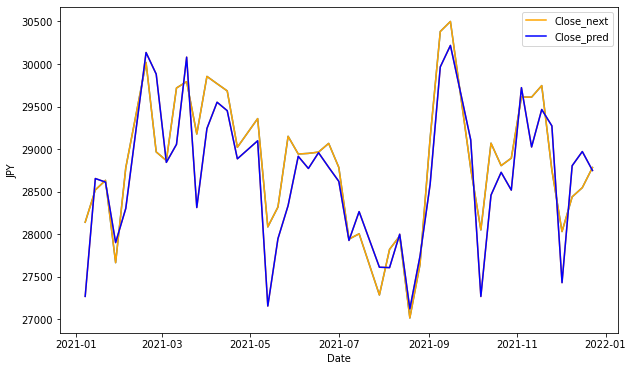

In [45]:
plt.figure(figsize=(10,6))
plt.plot(df_result[['Close_next','Close_pred']])
plt.plot(df_result['Close_next'],label='Close_next',color='orange')
plt.plot(df_result['Close_pred'],label='Close_pred',color='blue')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
plt.show()

In [46]:
df_result['diff']=df_result['Close_pred']-df_result['Close_next']
df_result

,Close_next,Close_pred,diff
Date,,,
2021-01-07,28139.029297,27267.174300,-871.854997
2021-01-14,28519.179688,28652.975163,133.795476
2021-01-21,28631.449219,28611.127246,-20.321973
2021-01-28,27663.390625,27899.565161,236.174536
2021-02-04,28779.189453,28301.238301,-477.951153
...,...,...,...
2021-11-25,28751.619141,29271.900249,520.281108
2021-12-02,28029.570312,27428.208420,-601.361893
2021-12-09,28437.769531,28803.904698,366.135167


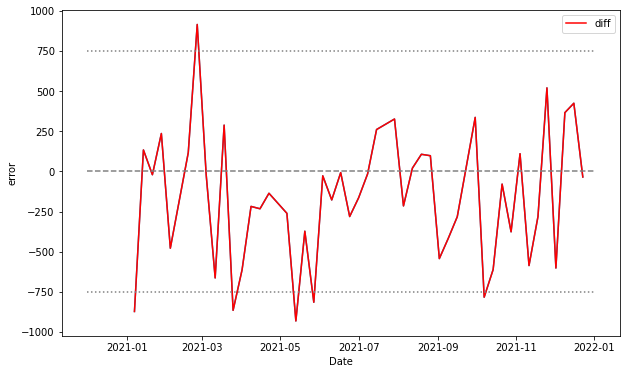

In [56]:
plt.figure(figsize=(10,6))
plt.plot(df_result[['diff']])
plt.plot(df_result['diff'],label='diff',color='red')
plt.xlabel('Date')
plt.ylabel('error')

xmin=datetime(2020,12,1)
xmax=datetime(2022,1,1)

plt.hlines(0,xmin,xmax,color='gray',linestyle='--')
plt.hlines(750,xmin,xmax,color='gray',linestyle=':')
plt.hlines(-750,xmin,xmax,color='gray',linestyle=':')
plt.legend()
plt.show()

誤差を小さくするには、  
説明変数、学習データ期間、予測モデルを見直す。

In [57]:
coef=pd.DataFrame(model.coef_)
coef.index=x_train.columns
coef

,0
High,0.017628
Low,-0.342642
Open,0.475533
Close,0.592470
Volume,-0.000002
...,...
sma1,-0.234137
sma2,-0.201099
sma3,0.077966
Body,-0.116937


In [58]:
model.intercept_

600.2921260789117

In [59]:
x_train.describe()

,High,Low,Open,Close,Volume,Adj Close,sma1,sma2,sma3,Body,Close_diff
count,146.000000,146.000000,146.000000,146.000000,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,22298.102686,22065.494843,22202.529083,22174.560721,7.433288e+07,22174.560721,22173.247346,22164.036962,22154.239021,27.968362,-23.304661
std,1559.027597,1602.983382,1558.689896,1593.250387,2.214278e+07,1593.250387,1548.152452,1500.769909,1451.165968,162.247579,265.426045
min,17160.970703,16358.190430,16995.769531,16552.830078,0.000000e+00,16552.830078,16944.800000,17647.499023,17983.368750,-371.429688,-915.179688
25%,21488.967773,21287.489746,21404.336914,21348.322754,6.220000e+07,21348.322754,21279.394238,21398.351172,21356.857747,-68.228027,-168.834473
50%,22285.825195,22065.250000,22189.254883,22191.609375,7.075000e+07,22191.609375,22177.097070,22088.985742,22103.505404,21.565430,-2.640625
75%,23203.060547,22888.586914,23110.392090,23023.372559,8.182500e+07,23023.372559,23138.541797,23093.306494,23126.927311,114.844238,124.198730
max,26868.089844,26719.230469,26744.500000,26809.369141,1.989000e+08,26809.369141,26727.373828,26697.680859,26696.868490,570.169922,750.558594


In [2]:
print('test')

test
